# Group Name: Data Innovators

## Team Members

### 1. **Stephanie Dawsonn-Andoh**
- **Email**: [stephandoh@gmail.com](mailto:stephandoh@gmail.com)
- **Country**: Ghana
- **Specialization**: Data Analytics

### 2. **Sreedhar Rongala**
- **Email**: [rongalasreedhar@gmail.com](mailto:rongalasreedhar@gmail.com)
- **Country**: India
- **Specialization**: Data Analytics

### 3. **Brittney Smith**
- **Email**: [brittneysintership@gmail.com](mailto:brittneysintership@gmail.com)
- **Country**: USA
- **Specialization**: Data Analytics


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [2]:
df = pd.read_csv(r"C:\Users\steph\Downloads\Customer Segmentation\Customers.csv")

C:\Users\steph\AppData\Local\Temp\ipykernel_42080\2045430512.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\steph\Downloads\Customer Segmentation\Customers.csv")


In [3]:
df.head(5)

Unnamed: 0 fecha_dato  ncodpers ind_empleado pais_residencia sexo age  \
0           0  1/28/2015   1375586            N              ES    H  35   
1           1  1/28/2015   1050611            N              ES    V  23   
2           2  1/28/2015   1050612            N              ES    V  23   
3           3  1/28/2015   1050613            N              ES    H  22   
4           4  1/28/2015   1050614            N              ES    V  23   

  fecha_alta            ind_nuevo antiguedad               indrel  \
0  1/12/2015                 0.00          6                 1.00   
1  8/10/2012                 0.00         35                 1.00   
2  8/10/2012                 0.00         35                 1.00   
3  8/10/2012                 0.00         35                 1.00   
4  8/10/2012                 0.00         35                 1.00   

  ult_fec_cli_1t          indrel_1mes tiprel_1mes indresi indext conyuemp  \
0            NaN                 1.00           A       S      N      NaN   
1            NaN                 1.00           I       S      S      NaN   
2            NaN                 1.00           I       S      N      NaN   
3            NaN                 1.00           I       S      N      NaN   
4            NaN                 1.00           A       S      N      NaN   

  canal_entrada indfall              tipodom             cod_prov  \
0           KHL       N                 1.00                29.00   
1           KHE       N                 1.00                13.00   
2           KHE       N                 1.00                13.00   
3           KHD       N                 1.00                50.00   
4           KHE       N                 1.00                50.00   

       nomprov  ind_actividad_cliente                renta  ind_ahor_fin_ult1  \
0       MALAGA                   1.00             87218.10                  0   
1  CIUDAD REAL                   0.00             35548.74                  0   
2  CIUDAD REAL                   0.00            122179.11                  0   
3     ZARAGOZA                   0.00            119775.54                  0   
4     ZARAGOZA                   1.00                  NaN                  0   

   ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  \
0                  0                 1                  0                 0   
1                  0                 1                  0                 0   
2                  0                 1                  0                 0   
3                  0                 0                  0                 0   
4                  0                 1                  0                 0   

   ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   

   ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  \
0                  0                 0                  0                  0   
1                  0                 0                  0                  0   
2                  0                 0                  0                  0 

In [4]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [5]:
# Dictionary to map the Spanish column names to English
column_mapping = {
    "Unnamed: 0": "unnamed_index",
    "fecha_dato": "data_date",
    "ncodpers": "customer_id",
    "ind_empleado": "employee_indicator",
    "pais_residencia": "country_of_residence",
    "sexo": "gender",
    "age": "age",
    "fecha_alta": "signup_date",
    "ind_nuevo": "new_customer_indicator",
    "antiguedad": "seniority",
    "indrel": "primary_relationship_status",
    "ult_fec_cli_1t": "last_date_primary_customer",
    "indrel_1mes": "customer_type_at_month_start",
    "tiprel_1mes": "customer_relation_type",
    "indresi": "resident_indicator",
    "indext": "foreigner_indicator",
    "conyuemp": "spouse_employee_indicator",
    "canal_entrada": "entry_channel",
    "indfall": "deceased_indicator",
    "tipodom": "address_type",
    "cod_prov": "province_code",
    "nomprov": "province_name",
    "ind_actividad_cliente": "customer_activity_index",
    "renta": "income",
    "ind_ahor_fin_ult1": "savings_product_indicator",
    "ind_aval_fin_ult1": "guarantee_product_indicator",
    "ind_cco_fin_ult1": "checking_account_product_indicator",
    "ind_cder_fin_ult1": "derivative_account_product_indicator",
    "ind_cno_fin_ult1": "payroll_account_product_indicator",
    "ind_ctju_fin_ult1": "junior_account_product_indicator",
    "ind_ctma_fin_ult1": "young_account_product_indicator",
    "ind_ctop_fin_ult1": "payroll_pension_account_indicator",
    "ind_ctpp_fin_ult1": "pension_account_product_indicator",
    "ind_deco_fin_ult1": "short_term_deposit_product_indicator",
    "ind_deme_fin_ult1": "medium_term_deposit_product_indicator",
    "ind_dela_fin_ult1": "long_term_deposit_product_indicator",
    "ind_ecue_fin_ult1": "e-account_product_indicator",
    "ind_fond_fin_ult1": "mutual_fund_product_indicator",
    "ind_hip_fin_ult1": "mortgage_product_indicator",
    "ind_plan_fin_ult1": "pension_plan_product_indicator",
    "ind_pres_fin_ult1": "loan_product_indicator",
    "ind_reca_fin_ult1": "tax_collector_product_indicator",
    "ind_tjcr_fin_ult1": "credit_card_product_indicator",
    "ind_valo_fin_ult1": "securities_product_indicator",
    "ind_viv_fin_ult1": "housing_product_indicator",
    "ind_nomina_ult1": "payroll_product_indicator",
    "ind_nom_pens_ult1": "pension_nomination_product_indicator",
    "ind_recibo_ult1": "direct_debit_product_indicator"
}

# Applying the renaming to the dataframe
df_renamed = df.rename(columns=column_mapping)

# Preview the renamed dataframe
df_renamed.head()

unnamed_index  data_date  customer_id employee_indicator  \
0              0  1/28/2015      1375586                  N   
1              1  1/28/2015      1050611                  N   
2              2  1/28/2015      1050612                  N   
3              3  1/28/2015      1050613                  N   
4              4  1/28/2015      1050614                  N   

  country_of_residence gender age signup_date  new_customer_indicator  \
0                   ES      H  35   1/12/2015                    0.00   
1                   ES      V  23   8/10/2012                    0.00   
2                   ES      V  23   8/10/2012                    0.00   
3                   ES      H  22   8/10/2012                    0.00   
4                   ES      V  23   8/10/2012                    0.00   

  seniority  primary_relationship_status last_date_primary_customer  \
0         6                         1.00                        NaN   
1        35                         1.00                        NaN   
2        35                         1.00                        NaN   
3        35                         1.00                        NaN   
4        35                         1.00                        NaN   

   customer_type_at_month_start customer_relation_type resident_indicator  \
0                          1.00                      A                  S   
1                          1.00                      I                  S   
2                          1.00                      I                  S   
3                          1.00                      I                  S   
4                          1.00                      A                  S   

  foreigner_indicator spouse_employee_indicator entry_channel  \
0                   N                       NaN           KHL   
1                   S                       NaN           KHE   
2                   N                       NaN           KHE   
3                   N                       NaN           KHD   
4                   N                       NaN           KHE   

  deceased_indicator         address_type        province_code province_name  \
0                  N                 1.00                29.00        MALAGA   
1                  N                 1.00                13.00   CIUDAD REAL   
2                  N                 1.00                13.00   CIUDAD REAL   
3                  N                 1.00                50.00      ZARAGOZA   
4                  N                 1.00                50.00      ZARAGOZA   

   customer_activity_index               income  savings_product_indicator  \
0                     1.00             87218.10                          0   
1                     0.00             35548.74                          0   
2                     0.00            122179.11                          0   
3                     0.00            119775.54                          0   
4                     1.00                  NaN                          0   

   guarantee_product_indicator  checking_account_product_indicator  \
0                            0                                   1   
1                            0                                   1   
2                            0                                   1   
3                            0                                   0   
4                            0                                   1   

   derivative_account_product_indicator  payroll_account_product_indicator  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   junior_account_product_indicator  young_account_product_indic

In [6]:
df_renamed.shape

(1000000, 48)

In [7]:
df_renamed.isnull().sum()

unnamed_index                                 0
data_date                                     0
customer_id                                   0
employee_indicator                        10782
country_of_residence                      10782
gender                                    10786
age                                           0
signup_date                               10782
new_customer_indicator                    10782
seniority                                     0
primary_relationship_status               10782
last_date_primary_customer               998899
customer_type_at_month_start              10782
customer_relation_type                    10782
resident_indicator                        10782
foreigner_indicator                       10782
spouse_employee_indicator                999822
entry_channel                             10861
deceased_indicator                        10782
address_type                              10782
province_code                           

In [8]:
df_renamed = df_renamed.drop(['unnamed_index', 'last_date_primary_customer', 'spouse_employee_indicator'], axis=1)


In [9]:
# Dropping unnecessary columns
df_renamed.drop(['province_code', 'province_name'], axis=1, inplace=True)

In [10]:
df_renamed.isnull().sum()

data_date                                     0
customer_id                                   0
employee_indicator                        10782
country_of_residence                      10782
gender                                    10786
age                                           0
signup_date                               10782
new_customer_indicator                    10782
seniority                                     0
primary_relationship_status               10782
customer_type_at_month_start              10782
customer_relation_type                    10782
resident_indicator                        10782
foreigner_indicator                       10782
entry_channel                             10861
deceased_indicator                        10782
address_type                              10782
customer_activity_index                   10782
income                                   175183
savings_product_indicator                     0
guarantee_product_indicator             

In [11]:
# Imputing with most frequent value
df_renamed['gender'].fillna(df_renamed['gender'].mode()[0], inplace=True)
df_renamed['country_of_residence'].fillna(df_renamed['country_of_residence'].mode()[0], inplace=True)

C:\Users\steph\AppData\Local\Temp\ipykernel_42080\912684135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_renamed['gender'].fillna(df_renamed['gender'].mode()[0], inplace=True)
C:\Users\steph\AppData\Local\Temp\ipykernel_42080\912684135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [12]:
# Imputing numeric values with median
df_renamed['income'].fillna(df_renamed['income'].median(), inplace=True)
df_renamed['payroll_product_indicator'].fillna(0, inplace=True)
df_renamed['pension_nomination_product_indicator'].fillna(0, inplace=True)

C:\Users\steph\AppData\Local\Temp\ipykernel_42080\4093595420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_renamed['income'].fillna(df_renamed['income'].median(), inplace=True)
C:\Users\steph\AppData\Local\Temp\ipykernel_42080\4093595420.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [13]:
df_renamed.isnull().sum()

data_date                                    0
customer_id                                  0
employee_indicator                       10782
country_of_residence                         0
gender                                       0
age                                          0
signup_date                              10782
new_customer_indicator                   10782
seniority                                    0
primary_relationship_status              10782
customer_type_at_month_start             10782
customer_relation_type                   10782
resident_indicator                       10782
foreigner_indicator                      10782
entry_channel                            10861
deceased_indicator                       10782
address_type                             10782
customer_activity_index                  10782
income                                       0
savings_product_indicator                    0
guarantee_product_indicator                  0
checking_acco

In [14]:
# Imputing with most frequent value
df_renamed['employee_indicator'].fillna(df_renamed['employee_indicator'].mode()[0], inplace=True)
df_renamed['customer_relation_type'].fillna(df_renamed['customer_relation_type'].mode()[0], inplace=True)
df_renamed['resident_indicator'].fillna(df_renamed['resident_indicator'].mode()[0], inplace=True)
df_renamed['foreigner_indicator'].fillna(df_renamed['foreigner_indicator'].mode()[0], inplace=True)
df_renamed['entry_channel'].fillna(df_renamed['entry_channel'].mode()[0], inplace=True)
df_renamed['deceased_indicator'].fillna(df_renamed['deceased_indicator'].mode()[0], inplace=True)


C:\Users\steph\AppData\Local\Temp\ipykernel_42080\4232490199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_renamed['employee_indicator'].fillna(df_renamed['employee_indicator'].mode()[0], inplace=True)
C:\Users\steph\AppData\Local\Temp\ipykernel_42080\4232490199.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [15]:
df_renamed.isnull().sum()

data_date                                    0
customer_id                                  0
employee_indicator                           0
country_of_residence                         0
gender                                       0
age                                          0
signup_date                              10782
new_customer_indicator                   10782
seniority                                    0
primary_relationship_status              10782
customer_type_at_month_start             10782
customer_relation_type                       0
resident_indicator                           0
foreigner_indicator                          0
entry_channel                                0
deceased_indicator                           0
address_type                             10782
customer_activity_index                  10782
income                                       0
savings_product_indicator                    0
guarantee_product_indicator                  0
checking_acco

In [16]:
df_renamed = df_renamed.dropna()

In [17]:
df_renamed.isnull().sum()

data_date                                0
customer_id                              0
employee_indicator                       0
country_of_residence                     0
gender                                   0
age                                      0
signup_date                              0
new_customer_indicator                   0
seniority                                0
primary_relationship_status              0
customer_type_at_month_start             0
customer_relation_type                   0
resident_indicator                       0
foreigner_indicator                      0
entry_channel                            0
deceased_indicator                       0
address_type                             0
customer_activity_index                  0
income                                   0
savings_product_indicator                0
guarantee_product_indicator              0
checking_account_product_indicator       0
derivative_account_product_indicator     0
payroll_acc

In [18]:
df_renamed.shape

(989218, 43)

In [19]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989218 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   data_date                              989218 non-null  object 
 1   customer_id                            989218 non-null  int64  
 2   employee_indicator                     989218 non-null  object 
 3   country_of_residence                   989218 non-null  object 
 4   gender                                 989218 non-null  object 
 5   age                                    989218 non-null  object 
 6   signup_date                            989218 non-null  object 
 7   new_customer_indicator                 989218 non-null  float64
 8   seniority                              989218 non-null  object 
 9   primary_relationship_status            989218 non-null  float64
 10  customer_type_at_month_start           989218 non-null  float

In [20]:
# Convert numeric columns stored as objects to integers or floats
df_renamed['age'] = pd.to_numeric(df_renamed['age'], errors='coerce')
df_renamed['seniority'] = pd.to_numeric(df_renamed['seniority'], errors='coerce')
df_renamed['customer_activity_index'] = pd.to_numeric(df_renamed['customer_activity_index'], errors='coerce')

In [21]:
# Convert categorical columns to appropriate numeric types
df_renamed['new_customer_indicator'] = pd.to_numeric(df_renamed['new_customer_indicator'], errors='coerce')
df_renamed['customer_type_at_month_start'] = pd.to_numeric(df_renamed['customer_type_at_month_start'], errors='coerce')

In [22]:
df_renamed['data_date'] = pd.to_datetime(df_renamed['data_date'], errors='coerce')


In [23]:
df_renamed['signup_date'] = pd.to_datetime(df_renamed['signup_date'], errors='coerce')

In [24]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989218 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   data_date                              989218 non-null  datetime64[ns]
 1   customer_id                            989218 non-null  int64         
 2   employee_indicator                     989218 non-null  object        
 3   country_of_residence                   989218 non-null  object        
 4   gender                                 989218 non-null  object        
 5   age                                    989218 non-null  int64         
 6   signup_date                            989218 non-null  datetime64[ns]
 7   new_customer_indicator                 989218 non-null  float64       
 8   seniority                              989218 non-null  int64         
 9   primary_relationship_status            989218 non-nul

In [25]:
df_renamed['new_customer_indicator'] = pd.to_numeric(df_renamed['new_customer_indicator'], errors='coerce')


In [26]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989218 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   data_date                              989218 non-null  datetime64[ns]
 1   customer_id                            989218 non-null  int64         
 2   employee_indicator                     989218 non-null  object        
 3   country_of_residence                   989218 non-null  object        
 4   gender                                 989218 non-null  object        
 5   age                                    989218 non-null  int64         
 6   signup_date                            989218 non-null  datetime64[ns]
 7   new_customer_indicator                 989218 non-null  float64       
 8   seniority                              989218 non-null  int64         
 9   primary_relationship_status            989218 non-nul

In [27]:
df_renamed['new_customer_indicator'] = df_renamed['new_customer_indicator'].astype(int)
df_renamed['primary_relationship_status'] = df_renamed['primary_relationship_status'].astype(int)
df_renamed['customer_type_at_month_start'] = df_renamed['customer_type_at_month_start'].astype(int)
df_renamed['address_type'] = df_renamed['address_type'].astype(int)
df_renamed['customer_activity_index'] = df_renamed['customer_activity_index'].astype(int)
df_renamed['pension_nomination_product_indicator'] = df_renamed['pension_nomination_product_indicator'].astype(int)
df_renamed['direct_debit_product_indicator'] = df_renamed['direct_debit_product_indicator'].astype(int)
df_renamed['payroll_product_indicator'] = df_renamed['payroll_product_indicator'].astype(int)


In [28]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989218 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   data_date                              989218 non-null  datetime64[ns]
 1   customer_id                            989218 non-null  int64         
 2   employee_indicator                     989218 non-null  object        
 3   country_of_residence                   989218 non-null  object        
 4   gender                                 989218 non-null  object        
 5   age                                    989218 non-null  int64         
 6   signup_date                            989218 non-null  datetime64[ns]
 7   new_customer_indicator                 989218 non-null  int32         
 8   seniority                              989218 non-null  int64         
 9   primary_relationship_status            989218 non-nul

In [29]:
df_renamed.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

In [30]:
# Get a DataFrame with duplicate customer IDs
duplicate_customers = df_renamed[df_renamed.duplicated(subset='customer_id', keep=False)]

# Group by customer_id and aggregate the signup_dates
signup_date_check = duplicate_customers.groupby('customer_id')['signup_date'].agg(
    unique_dates='nunique',  # Count unique signup_dates
    all_dates=lambda x: list(x.unique())  # List all unique signup_dates
).reset_index()

# Filter for customer_ids with more than one unique signup_date
inconsistent_dates = signup_date_check[signup_date_check['unique_dates'] > 1]

# Display the results
if inconsistent_dates.empty:
    print("All duplicate instances have the same signup_date.")
else:
    print("Inconsistent signup_dates found for the following customer_ids:")
    print(inconsistent_dates[['customer_id', 'all_dates']])


All duplicate instances have the same signup_date.


In [31]:
# Create a new DataFrame with unique customer IDs
df_renamed = df_renamed.drop_duplicates(subset='customer_id')

# Now you can get the distinct count again
distinct_customer_count = df_renamed['customer_id'].nunique()
print(f'Distinct Customer Count after removing duplicates: {distinct_customer_count}')


Distinct Customer Count after removing duplicates: 619174


In [32]:
df_renamed.describe()

data_date          customer_id  \
count                         619174            619174.00   
mean   2015-01-28 00:48:18.261231872            775804.17   
min              2015-01-28 00:00:00             15889.00   
25%              2015-01-28 00:00:00            413245.25   
50%              2015-01-28 00:00:00            873682.50   
75%              2015-01-28 00:00:00           1131775.75   
max              2015-02-28 00:00:00           1379131.00   
std                              NaN            405400.24   

                       age                    signup_date  \
count            619174.00                         619174   
mean                 40.49  2008-06-19 18:56:22.676921344   
min                   2.00            1995-01-16 00:00:00   
25%                  25.00            2003-08-05 00:00:00   
50%                  39.00            2010-06-25 00:00:00   
75%                  51.00            2013-06-03 00:00:00   
max                 116.00            2015-02-27 00:00:00   
std                  17.06                            NaN   

       new_customer_indicator            seniority  \
count               619174.00            619174.00   
mean                     0.00                80.29   
min                      0.00           -999999.00   
25%                      0.00                24.00   
50%                      0.00                55.00   
75%                      0.00               141.00   
max                      1.00               246.00   
std                      0.03              1798.58   

       primary_relationship_status  customer_type_at_month_start  \
count                    619174.00                     619174.00   
mean                          1.12                          1.00   
min                           1.00                          1.00   
25%                           1.00                          1.00   
50%                           1.00                          1.00   
75%                           1.00                          1.00   
max                          99.00                          3.00   
std                           3.46                          0.01   

              address_type  customer_activity_index               income  \
count            619174.00                619174.00            619174.00   
mean                  1.00                     0.54            129874.51   
min                   1.00                     0.00              1202.73   
25%                   1.00                     0.00             75356.02   
50%                   1.00                     1.00            106651.86   
75%                   1.00                     1.00            142058.05   
max                   1.00                     1.00          28894395.51   
std                   0.00                     0.50            205973.30   

       savings_product_indicator  guarantee_product_indicator  \
count                  619174.00                    619174.00   
mean                        0.00                         0.00   
min                         0.00                         0.00   
25%                         0.00                         0.00   
50%                         0.00                         0.00   
75%                         0.00                         0.00   
max                         1.00                         1.00   
std                         0.01                         0.01   

       checking_account_product_indicator  \
count                           619174.00   
mean                                 0.78   
min                                  0.00   
25%                                  1.00   
50%                                  1.00   
75%                                  1.00   
max                                  1.00   
std                                  0.41   

       derivative_account_product_indicator  \
count                             619174.00   
mean                                   0.00   
min      

### Observation
- 2 and 116 in the age column seems weirds, check for outliers
- -9999999 in seniority seems weirds, investigate

In [33]:
# Get unique ages below 27
unique_ages_below_27 = df_renamed[df_renamed['age'] < 27]['age'].unique()

# Convert to a list if needed
unique_ages_below_27_list = unique_ages_below_27.tolist()

# Display the unique ages
print(unique_ages_below_27_list)


[23, 22, 24, 25, 26, 15, 12, 8, 6, 10, 9, 16, 11, 17, 14, 19, 13, 20, 7, 21, 18, 4, 5, 3, 2]


In [34]:
# Get unique ages below 27
unique_ages_above_90 = df_renamed[df_renamed['age'] > 90]['age'].unique()

# Convert to a list if needed
unique_ages_above_90_list = unique_ages_above_90.tolist()

# Display the unique ages
print(unique_ages_above_90_list)

[95, 96, 92, 93, 91, 94, 99, 98, 97, 100, 101, 106, 103, 102, 104, 111, 107, 109, 105, 112, 115, 110, 116, 108, 113]


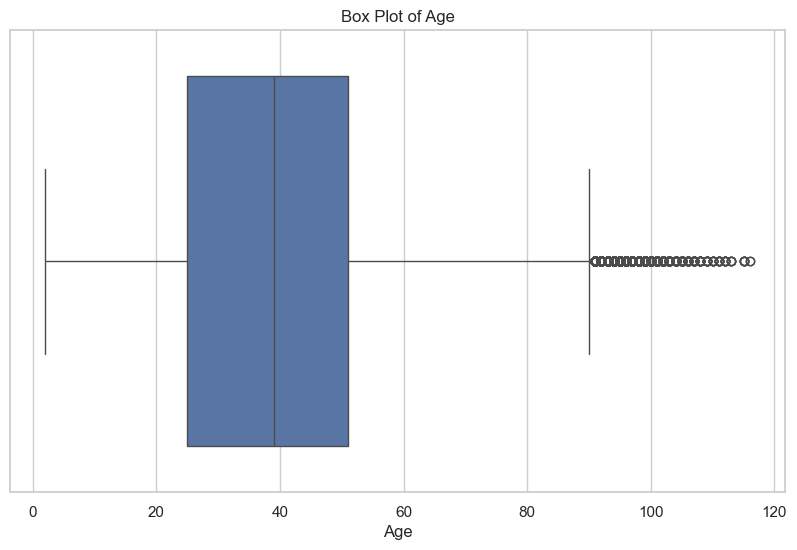

In [35]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a box plot for the age column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_renamed['age'])

# Set the title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')

# Show the plot
plt.show()


In [36]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_renamed['age'].quantile(0.25)
Q3 = df_renamed['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -14.0
Upper Bound: 90.0


In [37]:
# Identify outliers in the age column
outliers = df_renamed[(df_renamed['age'] < lower_bound) | (df_renamed['age'] > upper_bound)]

# Display the outliers
print(outliers[['customer_id', 'age']])  # Include other relevant columns if necessary


        customer_id  age
1917        1049693   95
1924        1049682   96
3680        1053264   96
4370        1054486   95
5063        1044349   92
...             ...  ...
733834       875227  103
802843       132059   91
855489        73077   93
857304        73564  104
901269       389204   91

[4084 rows x 2 columns]


In [38]:
# Cap ages above 92 to 92
df_renamed.loc[df_renamed['age'] > 92, 'age'] = 92

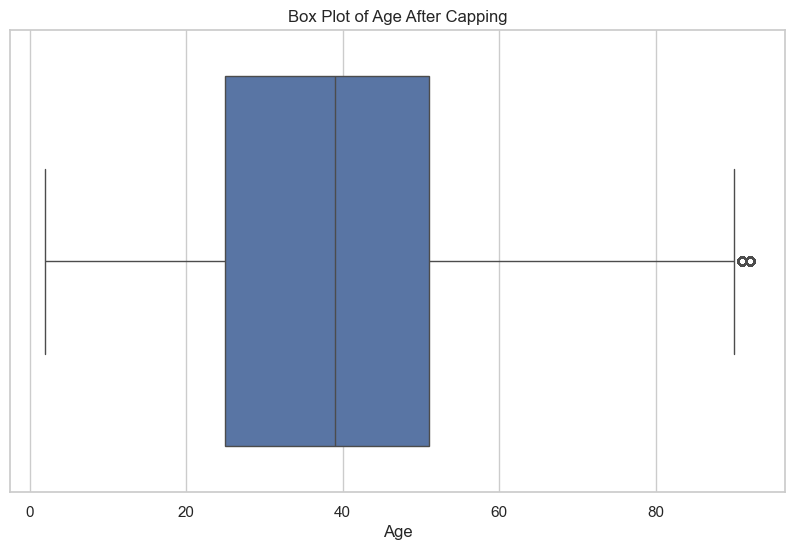

In [39]:
# box plot to visualize the age distribution after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_renamed['age'])
plt.title('Box Plot of Age After Capping')
plt.xlabel('Age')
plt.show()

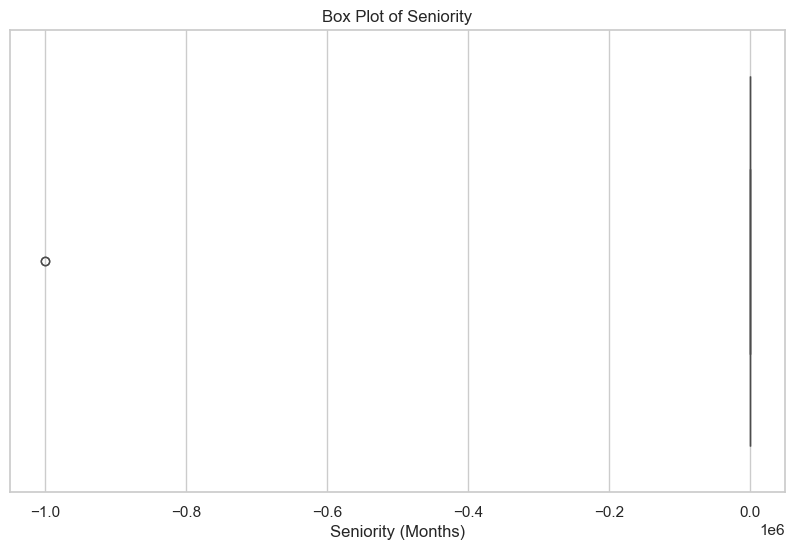

In [40]:
# box plot for the 'seniority' column to visualize any outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_renamed['seniority'])
plt.title('Box Plot of Seniority')
plt.xlabel('Seniority (Months)')
plt.show()

In [41]:
# Getting a list of seniority values below 33 and sorting them in ascending order
seniority_below_33_list = df_renamed[df_renamed['seniority'] < 33]['seniority'].tolist()
seniority_below_33_list_sorted = sorted(seniority_below_33_list)

# Displaying the first 5 elements of the sorted list
print(seniority_below_33_list_sorted[:5])


[-999999, -999999, 0, 0, 0]


In [42]:
# Replacing -999999 with 0 in the 'seniority' column
df_renamed['seniority'] = df_renamed['seniority'].replace(-999999, 0)

# Verifying if the replacement was successful
print(df_renamed['seniority'].value_counts())


seniority
21    19801
12    18894
10    17046
33    15886
45    14611
      ...  
4        38
0        37
2        31
1        26
3        22
Name: count, Length: 247, dtype: int64


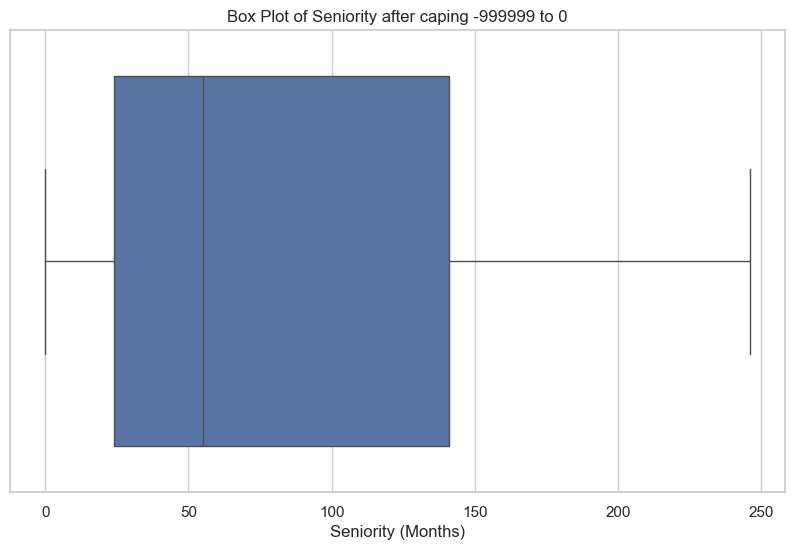

In [43]:
# box plot for the 'seniority' column to visualize any outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_renamed['seniority'])
plt.title('Box Plot of Seniority after caping -999999 to 0')
plt.xlabel('Seniority (Months)')
plt.show()

In [44]:
df_renamed.describe(include='O')

employee_indicator country_of_residence  gender customer_relation_type  \
count              619174               619174  619174                 619174   
unique                  5                  113       2                      3   
top                     N                   ES       V                      A   
freq               618694               615491  339657                 324117   

       resident_indicator foreigner_indicator entry_channel deceased_indicator  
count              619174              619174        619174             619174  
unique                  2                   2           156                  2  
top                     S                   N           KHE                  N  
freq               615491              592145        212526             617588

### Feature Engineering

In [45]:
df_renamed.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

In [46]:
df_renamed.head()

data_date  customer_id employee_indicator country_of_residence gender  age  \
0 2015-01-28      1375586                  N                   ES      H   35   
1 2015-01-28      1050611                  N                   ES      V   23   
2 2015-01-28      1050612                  N                   ES      V   23   
3 2015-01-28      1050613                  N                   ES      H   22   
4 2015-01-28      1050614                  N                   ES      V   23   

  signup_date  new_customer_indicator  seniority  primary_relationship_status  \
0  2015-01-12                       0          6                            1   
1  2012-08-10                       0         35                            1   
2  2012-08-10                       0         35                            1   
3  2012-08-10                       0         35                            1   
4  2012-08-10                       0         35                            1   

   customer_type_at_month_start customer_relation_type resident_indicator  \
0                             1                      A                  S   
1                             1                      I                  S   
2                             1                      I                  S   
3                             1                      I                  S   
4                             1                      A                  S   

  foreigner_indicator entry_channel deceased_indicator  address_type  \
0                   N           KHL                  N             1   
1                   S           KHE                  N             1   
2                   N           KHE                  N             1   
3                   N           KHD                  N             1   
4                   N           KHE                  N             1   

   customer_activity_index               income  savings_product_indicator  \
0                        1             87218.10                          0   
1                        0             35548.74                          0   
2                        0            122179.11                          0   
3                        0            119775.54                          0   
4                        1            106651.86                          0   

   guarantee_product_indicator  checking_account_product_indicator  \
0                            0                                   1   
1                            0                                   1   
2                            0                                   1   
3                            0                                   0   
4                            0                                   1   

   derivative_account_product_indicator  payroll_account_product_indicator  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   junior_account_product_indicator  young_account_product_indicator  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   payroll_pension_account_indicator  pension_account_product_indicator  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0     

In [47]:
df_renamed[['customer_activity_index', 'new_customer_indicator', 'seniority']].head()

customer_activity_index  new_customer_indicator  seniority
0                        1                       0          6
1                        0                       0         35
2                        0                       0         35
3                        0                       0         35
4                        1                       0         35

### Recency

In [48]:
# Define the recency function
def calculate_recency(row):
    if row['customer_activity_index'] == 1:
        return 0  # Active customers have recency of 0
    else:
        if row['new_customer_indicator'] == 1:
            return 50  # New inactive customers get a score of 50
        else:
            return 100  # Existing inactive customers get a score of 100

# Apply the function to the DataFrame
df_renamed['recency'] = df_renamed.apply(calculate_recency, axis=1)

# View the DataFrame with the new recency column
print(df_renamed[['customer_id', 'customer_activity_index', 'new_customer_indicator', 'recency']])

        customer_id  customer_activity_index  new_customer_indicator  recency
0           1375586                        1                       0        0
1           1050611                        0                       0      100
2           1050612                        0                       0      100
3           1050613                        0                       0      100
4           1050614                        1                       0        0
...             ...                      ...                     ...      ...
994782      1141600                        1                       0        0
995352      1150060                        0                       0      100
995403      1149999                        0                       0      100
996937      1150908                        0                       0      100
999991      1183305                        1                       0        0

[619174 rows x 4 columns]


In [49]:
# Count rows with recency = 0
recency_zero_count = df_renamed[df_renamed['recency'] == 0].shape[0]

# Count rows with recency > 0
recency_negative_count = df_renamed[df_renamed['recency'] > 0].shape[0]

print(f"Number of rows with recency = 0: {recency_zero_count}")
print(f"Number of rows with recency > 0: {recency_negative_count}")

Number of rows with recency = 0: 333074
Number of rows with recency > 0: 286100


### Frequency

In [50]:
# List of product indicator columns
product_columns = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate frequency of product usage
df_renamed['frequency'] = df_renamed[product_columns].sum(axis=1)

# View the updated DataFrame with the new frequency column
df_renamed[['customer_id'] + product_columns + ['frequency']].head()


customer_id  savings_product_indicator  guarantee_product_indicator  \
0      1375586                          0                            0   
1      1050611                          0                            0   
2      1050612                          0                            0   
3      1050613                          0                            0   
4      1050614                          0                            0   

   checking_account_product_indicator  derivative_account_product_indicator  \
0                                   1                                     0   
1                                   1                                     0   
2                                   1                                     0   
3                                   0                                     0   
4                                   1                                     0   

   payroll_account_product_indicator  junior_account_product_indicator  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   

   young_account_product_indicator  payroll_pension_account_indicator  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   pension_account_product_indicator  short_term_deposit_product_indicator  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     1   
4                                  0                                     0   

   medium_term_deposit_product_indicator  long_term_deposit_product_indicator  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   e-account_product_indicator  mutual_fund_product_indicator  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   mortgage_product_indicator  pension_plan_product_indicator  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   loan_product_indicator  tax_collector_product_indicator  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   

   credit_card_product_indicator  securities_product_indicator  \
0                     

In [51]:
# Get distribution statistics for the frequency column
frequency_stats = df_renamed['frequency'].describe(percentiles=[0.25, 0.5, 0.75])

# Display the statistics
print(frequency_stats)


count              619174.00
mean                    1.78
std                     1.52
min                     0.00
25%                     1.00
50%                     1.00
75%                     2.00
max                    14.00
Name: frequency, dtype: float64


### Monetary value

In [52]:
# Assuming you have the frequency column already calculated in df_renamed

# Calculate the monetary value by multiplying income with frequency
df_renamed['monetary_value'] = df_renamed['income'] * df_renamed['frequency']

# View the updated DataFrame with customer_id, income, frequency, and monetary_value
df_renamed[['customer_id', 'income', 'frequency', 'monetary_value']].head()




customer_id               income  frequency       monetary_value
0      1375586             87218.10          1             87218.10
1      1050611             35548.74          1             35548.74
2      1050612            122179.11          1            122179.11
3      1050613            119775.54          1            119775.54
4      1050614            106651.86          1            106651.86

In [53]:
# Optional: Check the distribution of the monetary value
monetary_stats = df_renamed['monetary_value'].describe()
print(monetary_stats)

count              619174.00
mean               248429.21
std                679049.48
min                     0.00
25%                 85344.42
50%                122232.66
75%                256083.08
max             220347387.60
Name: monetary_value, dtype: float64


In [54]:
df_renamed.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

### EDA before K-Means Clustering

In [55]:
# Summary statistics for numerical features
numerical_summary = df_renamed.describe(include='number')
print("Numerical Summary Statistics:")
print(numerical_summary)

Numerical Summary Statistics:
               customer_id                  age  new_customer_indicator  \
count            619174.00            619174.00               619174.00   
mean             775804.17                40.47                    0.00   
std              405400.24                16.99                    0.03   
min               15889.00                 2.00                    0.00   
25%              413245.25                25.00                    0.00   
50%              873682.50                39.00                    0.00   
75%             1131775.75                51.00                    0.00   
max             1379131.00                92.00                    1.00   

                 seniority  primary_relationship_status  \
count            619174.00                    619174.00   
mean                 83.52                         1.12   
std                  65.18                         3.46   
min                   0.00                         1.00   

In [56]:
# Summary statistics for categorical features
categorical_summary = df_renamed.describe(include='object')
print("\nCategorical Summary Statistics:")
print(categorical_summary)


Categorical Summary Statistics:
       employee_indicator country_of_residence  gender customer_relation_type  \
count              619174               619174  619174                 619174   
unique                  5                  113       2                      3   
top                     N                   ES       V                      A   
freq               618694               615491  339657                 324117   

       resident_indicator foreigner_indicator entry_channel deceased_indicator  
count              619174              619174        619174             619174  
unique                  2                   2           156                  2  
top                     S                   N           KHE                  N  
freq               615491              592145        212526             617588  


In [57]:
# Data types of each column
data_types = df_renamed.dtypes
print("\nData Types for Each Column:")
print(data_types)


Data Types for Each Column:
data_date                                datetime64[ns]
customer_id                                       int64
employee_indicator                               object
country_of_residence                             object
gender                                           object
age                                               int64
signup_date                              datetime64[ns]
new_customer_indicator                            int32
seniority                                         int64
primary_relationship_status                       int32
customer_type_at_month_start                      int32
customer_relation_type                           object
resident_indicator                               object
foreigner_indicator                              object
entry_channel                                    object
deceased_indicator                               object
address_type                                      int32
customer_activity_i

In [58]:
# Count of missing values in each column
missing_values = df_renamed.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values


Missing Values in Each Column:
Series([], dtype: int64)


In [59]:
# Set style for better aesthetics
sns.set(style='whitegrid')

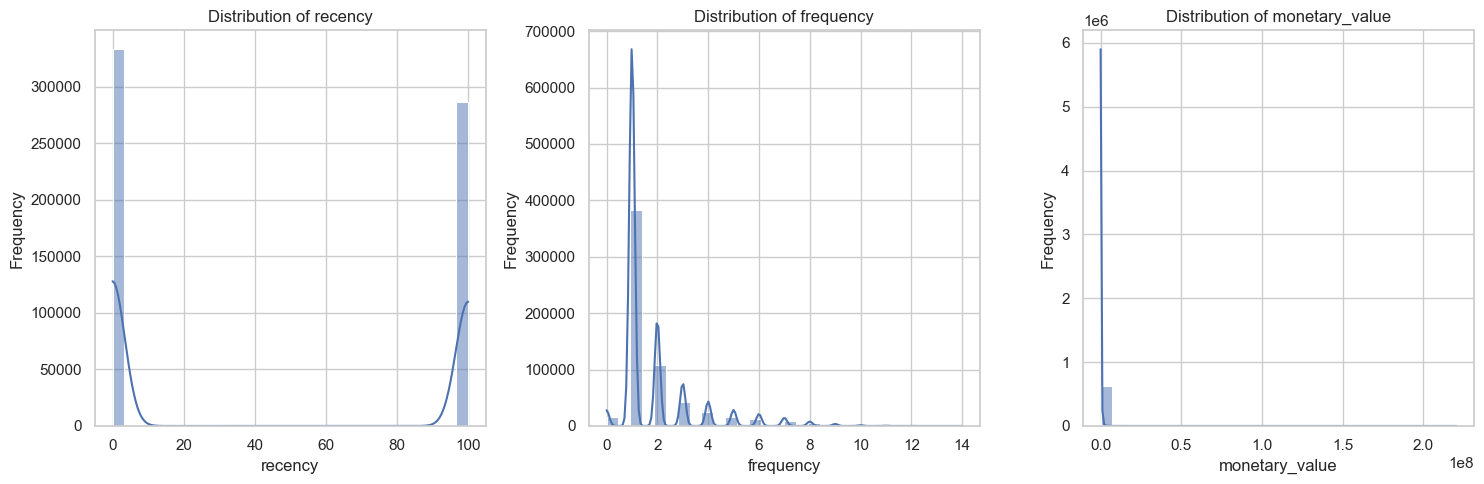

In [60]:
# Plot histograms for numerical features
numerical_features = ['recency', 'frequency', 'monetary_value'] 

plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(df_renamed[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- The bank's customer base is heterogeneous in terms of recent activity. By understanding these differences and implementing targeted strategies, the bank can improve customer retention, increase customer loyalty, and drive revenue growth.

- The right-skewed distribution suggests that the customer base is heterogeneous in terms of product usage. A large majority of customers are relatively low-product users, while a small minority of customers are high-product users.

- A large majority of customers are relatively low-spending customers, while a small minority of customers are high-spending customers.

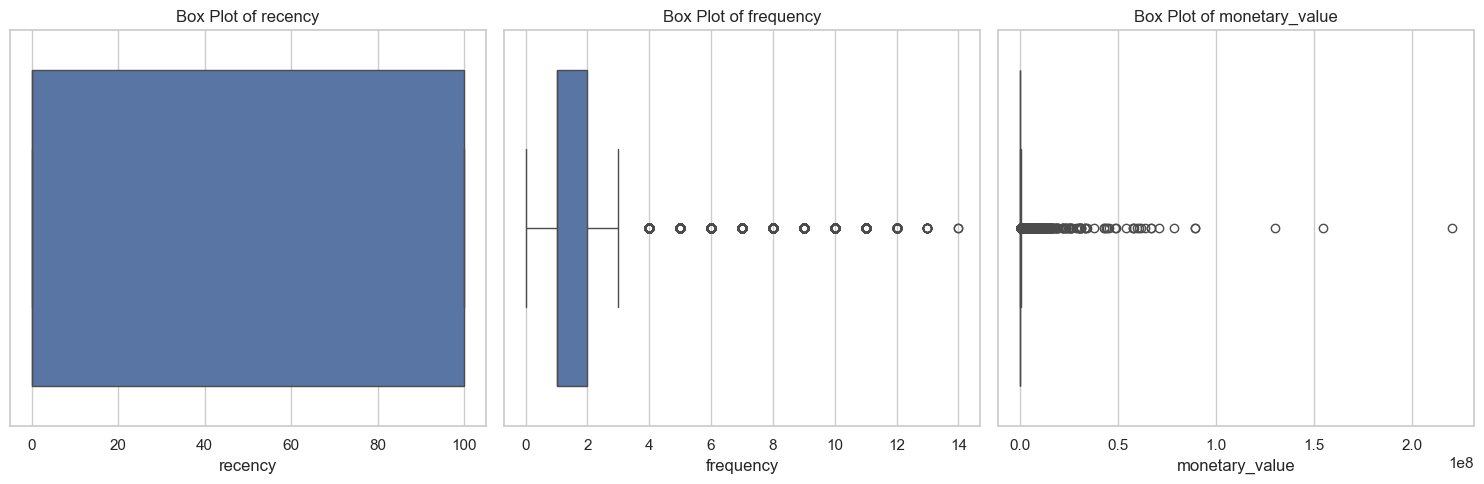

In [61]:
# Box plots for numerical features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(x=df_renamed[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


- These are outliers resulting from feaure engineering and are relevant in this analysis

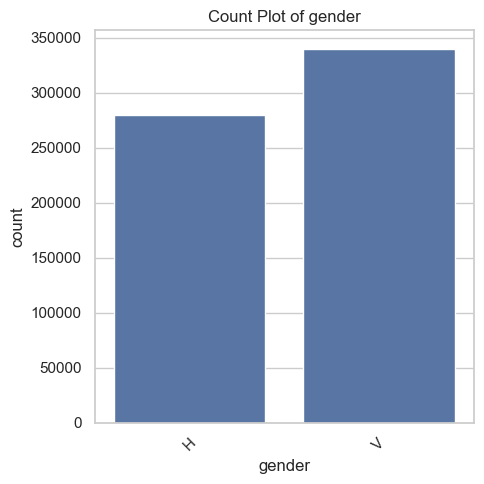

In [62]:
# Count plots for categorical features
categorical_features = ['gender'] 

plt.figure(figsize=(5, 5))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.countplot(data=df_renamed, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- there is a higher number of women than men in the dataset

In [63]:
# Drop non-numeric columns
df_numeric = df_renamed.select_dtypes(include=['number'])


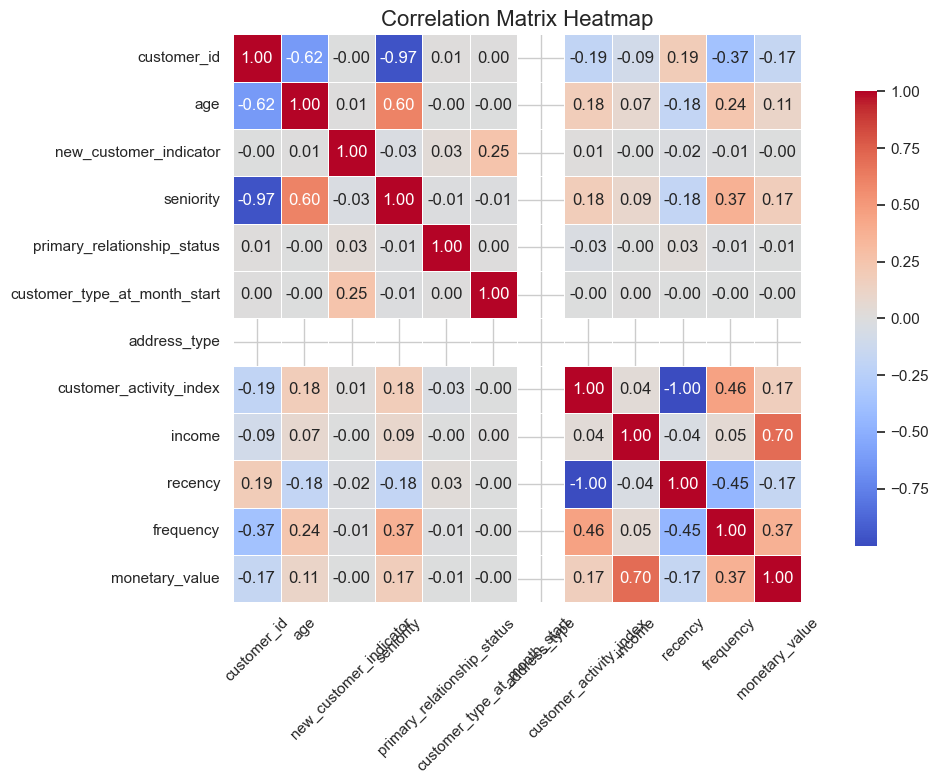

In [64]:
# List of product indicator columns to exclude
exclude_columns = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Select all numeric columns
df_numeric = df_renamed.select_dtypes(include=['number'])

# Drop the unwanted columns
df_numeric_cleaned = df_numeric.drop(columns=exclude_columns, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = df_numeric_cleaned.corr()

# Create a heatmap for the cleaned correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



- Age vs. Seniority: Older customers tend to have higher seniority, indicating a relationship between age and tenure.

- Income vs. Monetary Value: Customers with higher incomes tend to have higher monetary values, suggesting a relationship between income and spending.

- Frequency vs. Monetary Value: Customers who use more products or services tend to have higher monetary values, indicating a relationship between product usage and spending.

In [65]:
# Summary statistics for RFM features
rfm_summary = df_renamed[['recency', 'frequency', 'monetary_value']].describe()
print(rfm_summary)


                   recency            frequency       monetary_value
count            619174.00            619174.00            619174.00
mean                 46.20                 1.78            248429.21
std                  49.85                 1.52            679049.48
min                   0.00                 0.00                 0.00
25%                   0.00                 1.00             85344.42
50%                   0.00                 1.00            122232.66
75%                 100.00                 2.00            256083.08
max                 100.00                14.00         220347387.60


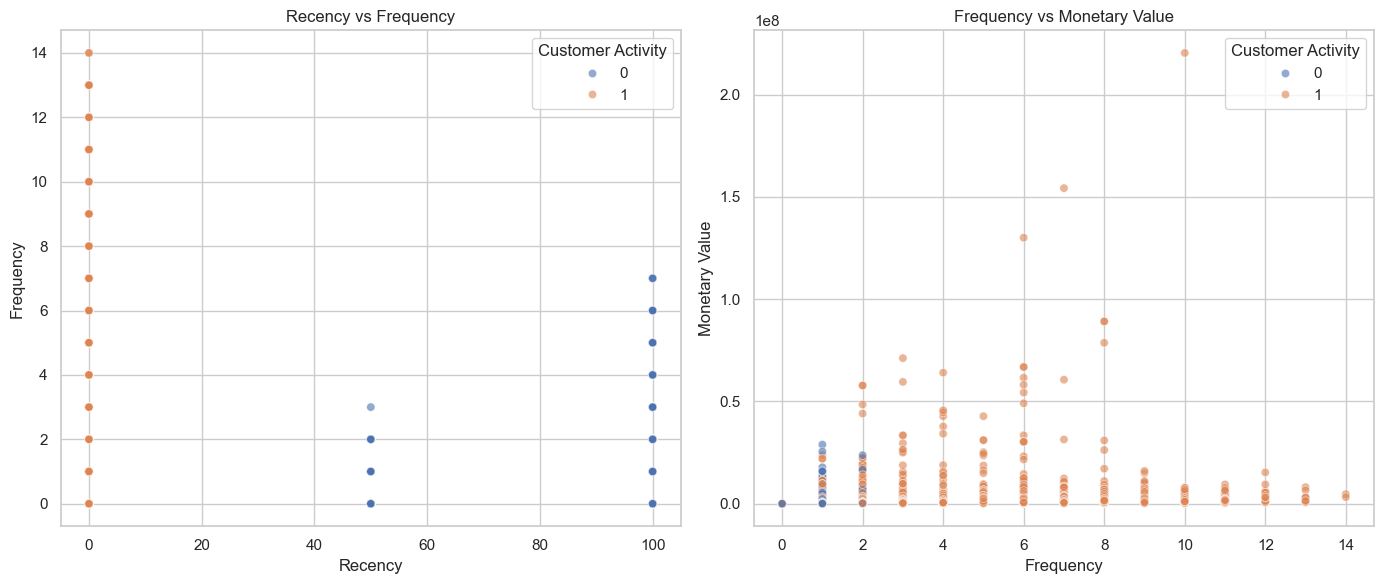

In [66]:
# Scatter plot: Recency vs Frequency
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_renamed, x='recency', y='frequency', hue='customer_activity_index', alpha=0.6)
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Customer Activity', loc='upper right')

# Scatter plot: Frequency vs Monetary Value
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_renamed, x='frequency', y='monetary_value', hue='customer_activity_index', alpha=0.6)
plt.title('Frequency vs Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Customer Activity', loc='upper right')

plt.tight_layout()
plt.show()

RECENCY VS FREQUENCY

- Low-Activity, Low-Product Customers: These customers have recently used the bank's products but have not used many different ones. This group may require targeted marketing efforts to encourage them to use more products or services.

- High-Activity, High-Product Customers: These customers have been using the bank's products for a longer time and have used a variety of them. This group may be valuable to the bank due to their high spending and loyalty.


FREQUENCY VS MONETARY VALUE

- Low-Usage, Low-Spending Customers: These customers use few products and spend little. This group may require targeted marketing efforts to encourage them to use more products or services.

- High-Usage, High-Spending Customers: These customers use many products and spend a lot. This group may be valuable to the bank due to their high spending and loyalty.

- Moderate-Usage, Moderate-Spending Customers: These customers have moderate product usage and spending. This group may represent an opportunity for up-selling and cross-selling to increase their spending.


### Preliminary Clustering Visualization

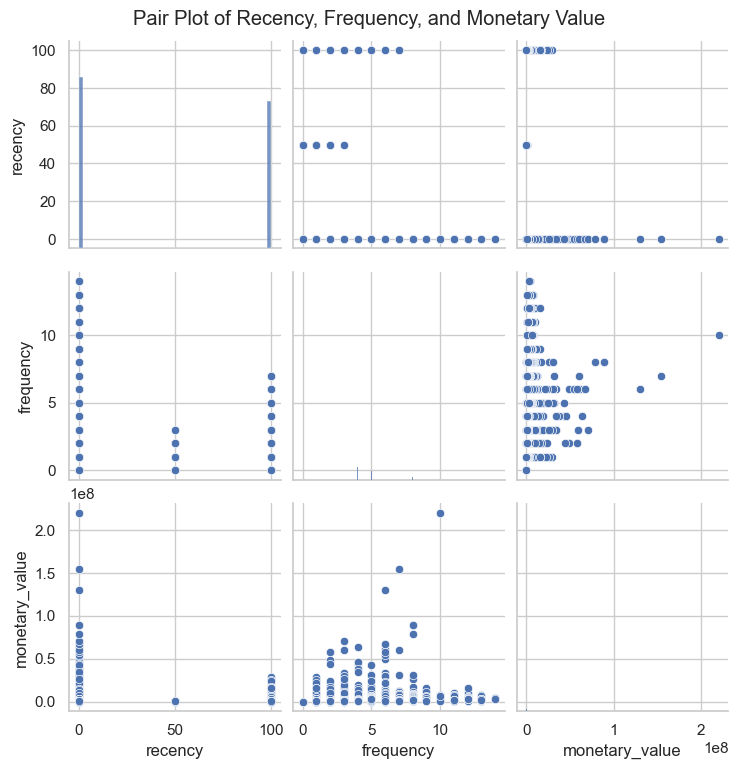

In [67]:
pair_plot_data = df_renamed[['recency', 'frequency', 'monetary_value']]

# Create pair plots
sns.pairplot(pair_plot_data)
plt.suptitle("Pair Plot of Recency, Frequency, and Monetary Value", y=1.02)
plt.show()

Cluster Centers:
 [[ 9.99908317e+01  1.01117977e+00  1.11063491e+05  2.61433699e+01
   3.15233986e+01]
 [-1.83391080e-11  2.19043782e+00  2.98779716e+05  5.45564458e+01
   1.41063566e+02]
 [ 2.12046915e-02  1.47692665e+00  1.70232754e+05  3.17638460e+01
   3.60107879e+01]
 [ 9.99966968e+01  1.06864105e+00  1.45879457e+05  5.57881122e+01
   1.37269779e+02]
 [ 2.29861255e-01  6.03607372e+00  1.08998009e+06  4.83512736e+01
   1.48102257e+02]]


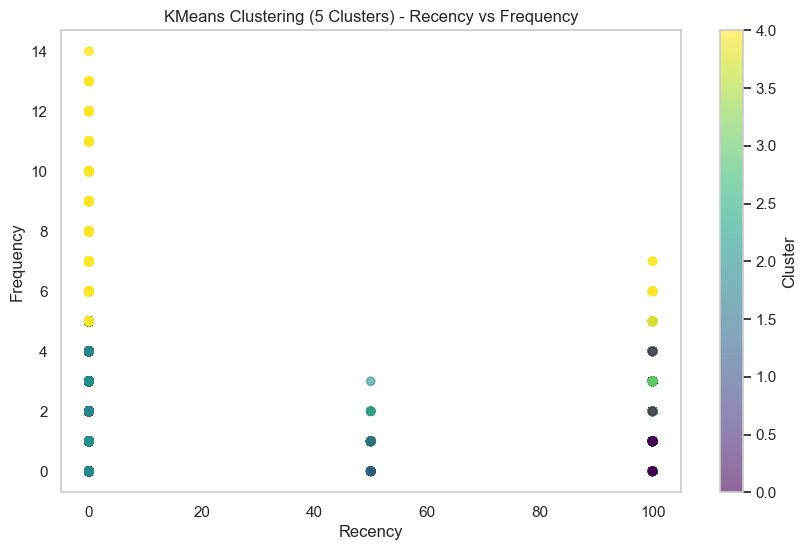

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
X = df_renamed[['recency', 'frequency', 'monetary_value', 'age', 'seniority']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df_renamed['cluster'] = kmeans.labels_

# (Optional) Print cluster centers for insight
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:\n", cluster_centers)

# Visualize the clusters (using only recency and frequency for better visualization)
plt.figure(figsize=(10, 6))
plt.scatter(df_renamed['recency'], df_renamed['frequency'], c=df_renamed['cluster'], cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering (5 Clusters) - Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


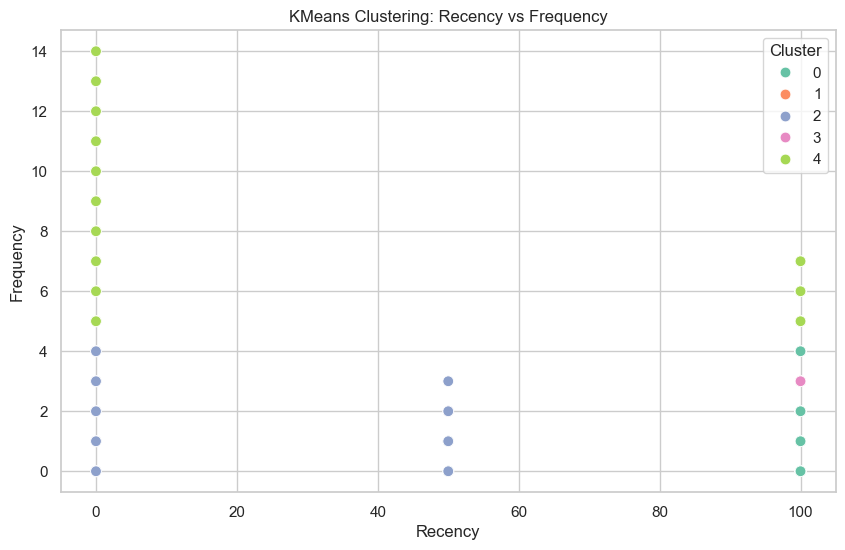

In [69]:
# 2D Scatter plot for Recency vs Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='recency', 
    y='frequency', 
    hue='cluster', 
    palette='Set2', 
    data=df_renamed, 
    s=60
)
plt.title('KMeans Clustering: Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

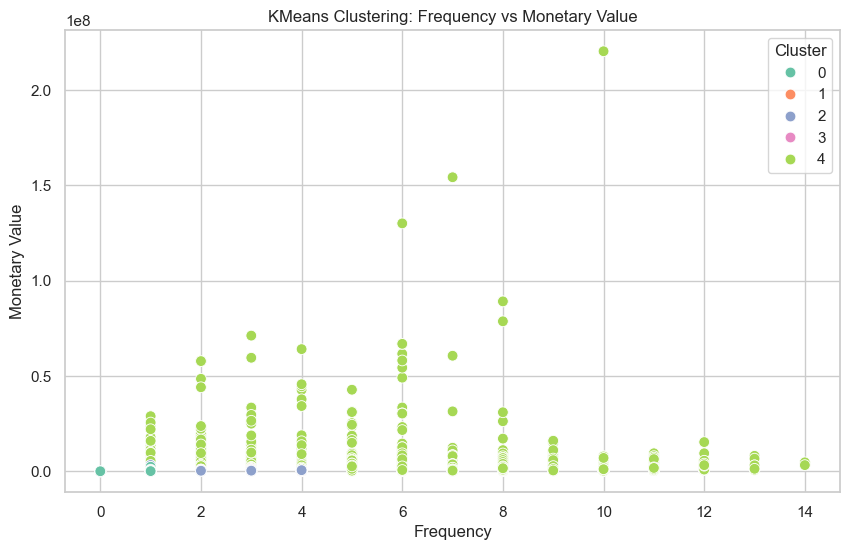

In [70]:
# 2D Scatter plot for Frequency vs Monetary Value
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='frequency', 
    y='monetary_value', 
    hue='cluster', 
    palette='Set2', 
    data=df_renamed, 
    s=60
)
plt.title('KMeans Clustering: Frequency vs Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

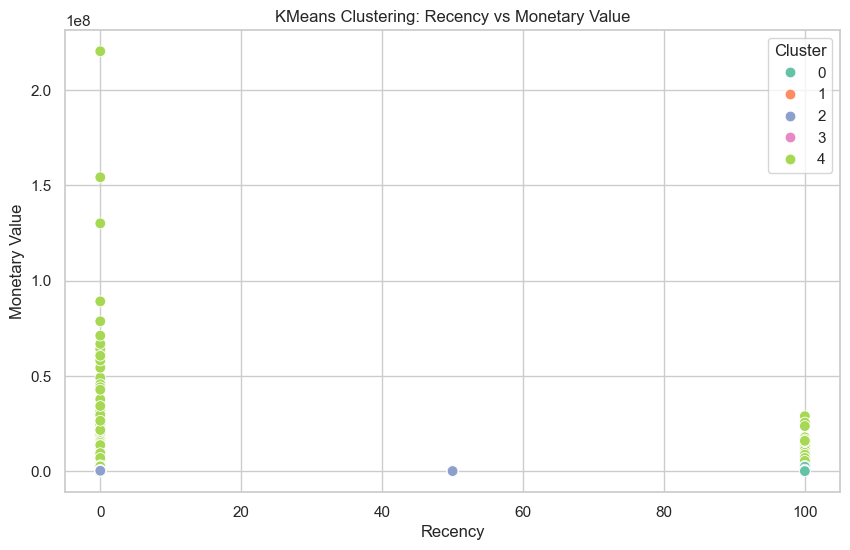

In [71]:
# 2D Scatter plot for Recency vs Monetary Value
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='recency', 
    y='monetary_value', 
    hue='cluster', 
    palette='Set2', 
    data=df_renamed, 
    s=60
)
plt.title('KMeans Clustering: Recency vs Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

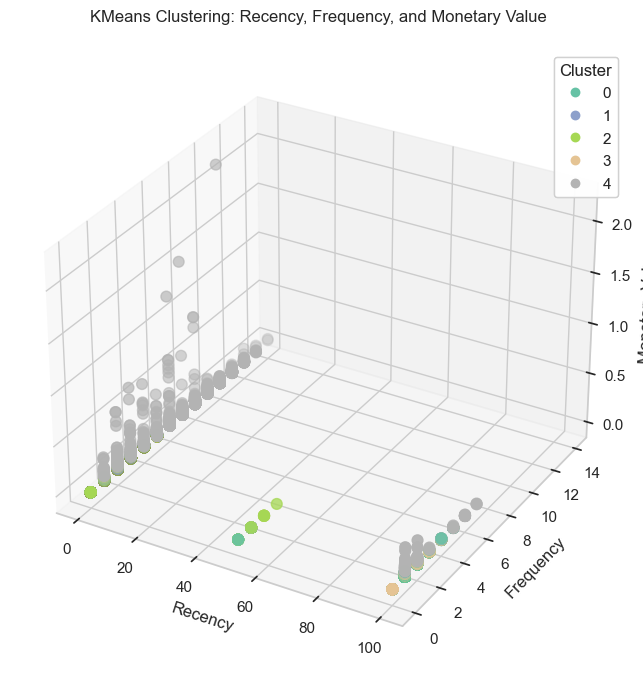

In [72]:
# 3D Scatter plot for Recency, Frequency, and Monetary Value
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    df_renamed['recency'], 
    df_renamed['frequency'], 
    df_renamed['monetary_value'], 
    c=df_renamed['cluster'], 
    cmap='Set2', 
    s=60
)

ax.set_title('KMeans Clustering: Recency, Frequency, and Monetary Value', pad=20)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

# Adding the legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()

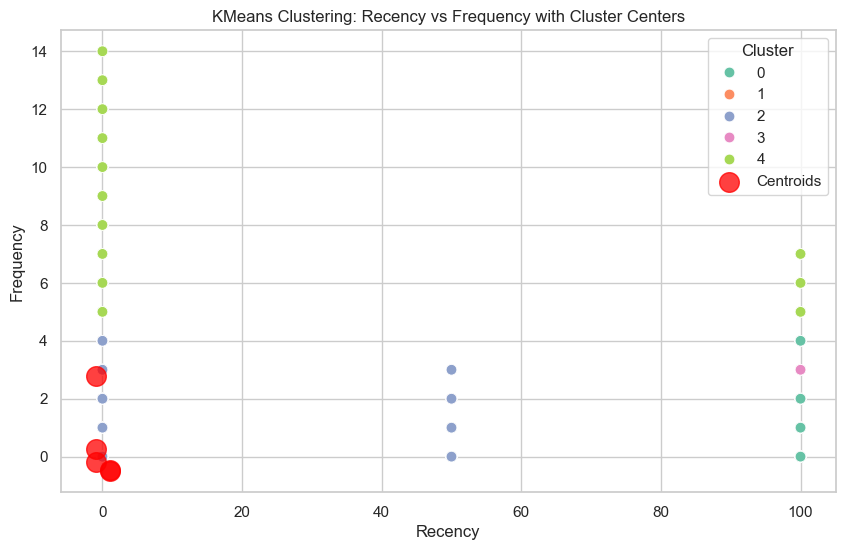

In [73]:
# Get the cluster centers from the KMeans model
centers = kmeans.cluster_centers_

# 2D Scatter plot for Recency vs Frequency with Cluster Centers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='recency', 
    y='frequency', 
    hue='cluster', 
    palette='Set2', 
    data=df_renamed, 
    s=60
)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids')

plt.title('KMeans Clustering: Recency vs Frequency with Cluster Centers')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [74]:
# Select only the numeric columns
numeric_columns = df_renamed.select_dtypes(include=['number']).columns

# Group by 'cluster' and calculate the mean for numeric columns only
cluster_summary = df_renamed.groupby('cluster')[numeric_columns].mean()

# Display the result
print(cluster_summary)


                 customer_id                  age  new_customer_indicator  \
cluster                                                                     
0                 1102390.19                26.14                    0.00   
1                  417943.05                54.56                    0.00   
2                 1060289.11                31.79                    0.00   
3                  446408.93                55.79                    0.00   
4                  382556.45                48.36                    0.00   

                   seniority  primary_relationship_status  \
cluster                                                     
0                      31.52                         1.25   
1                     141.20                         1.01   
2                      36.07                         1.05   
3                     137.27                         1.20   
4                     148.10                         1.02   

         customer_type_at_month_

In [75]:
df_renamed.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

### EDA post KMeans Clusters

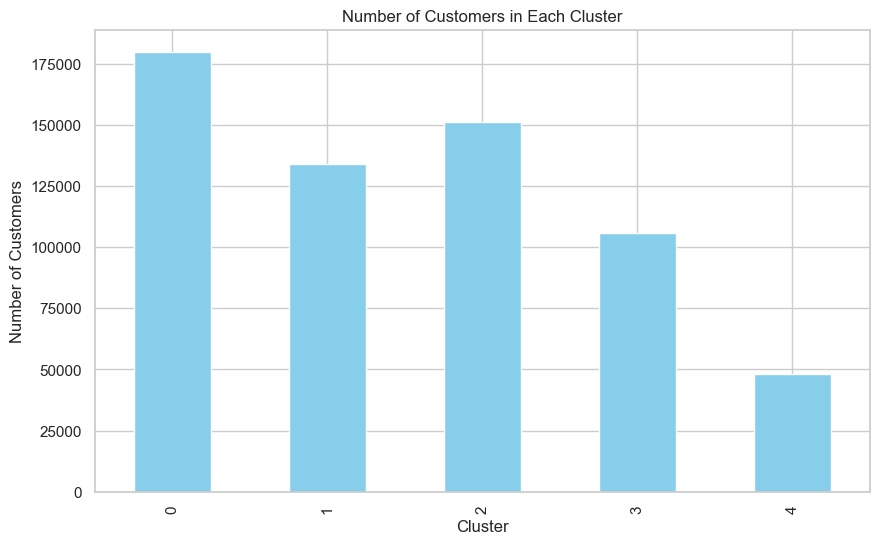

In [76]:
cluster_counts = df_renamed['cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


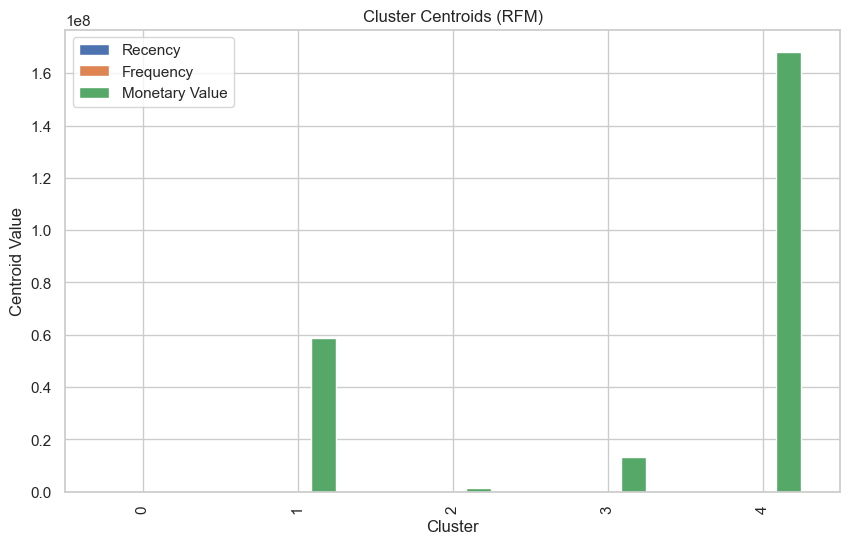

In [77]:
# Fit KMeans using only the RFM columns
X_rfm = df_renamed[['recency', 'frequency', 'monetary_value']]
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_rfm)

# Now you can plot the centroids
cluster_centers = kmeans.cluster_centers_
centroid_df = pd.DataFrame(cluster_centers, columns=['recency', 'frequency', 'monetary_value'])

centroid_df.plot(kind='bar', figsize=(10,6))
plt.title('Cluster Centroids (RFM)')
plt.xlabel('Cluster')
plt.ylabel('Centroid Value')
plt.legend(['Recency', 'Frequency', 'Monetary Value'])
plt.show()



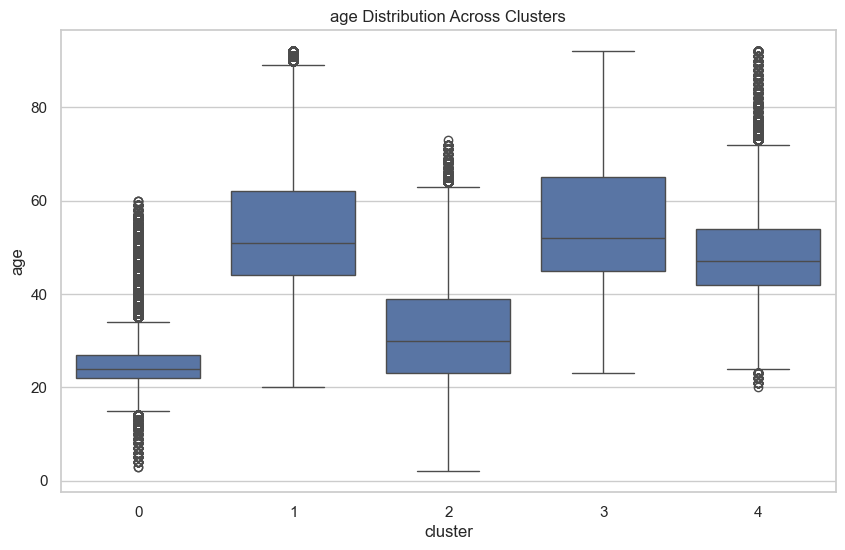

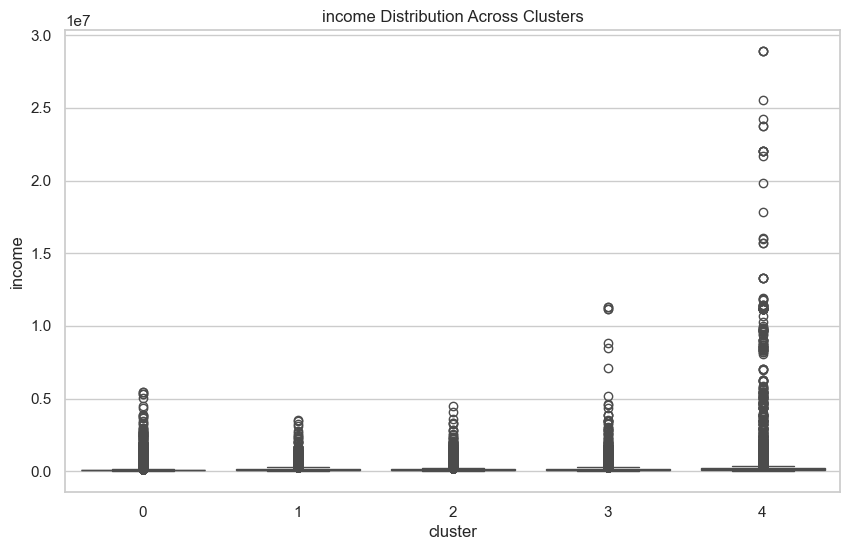

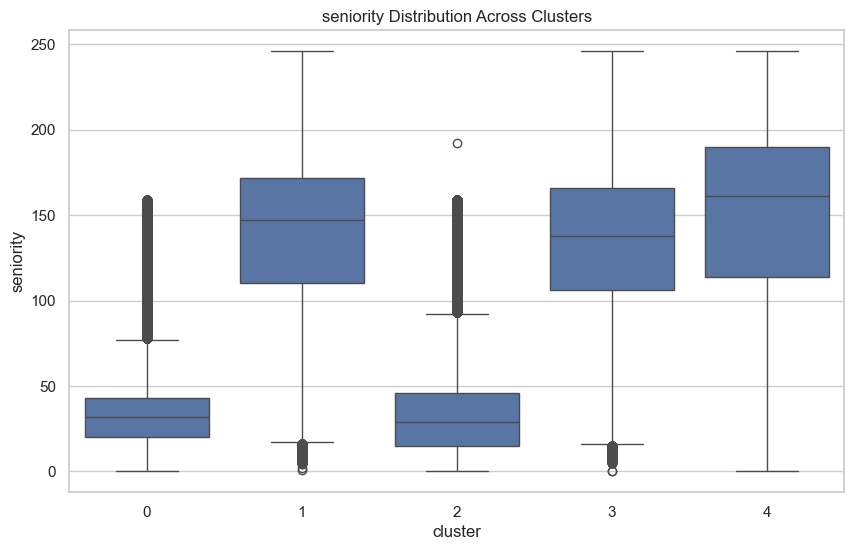

In [78]:
features = ['age', 'income', 'seniority']
for feature in features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='cluster', y=feature, data=df_renamed)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()



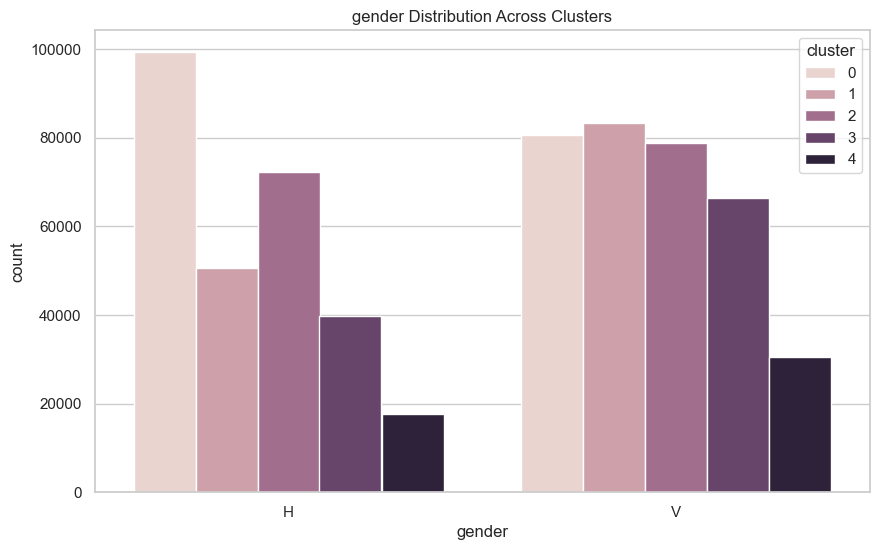

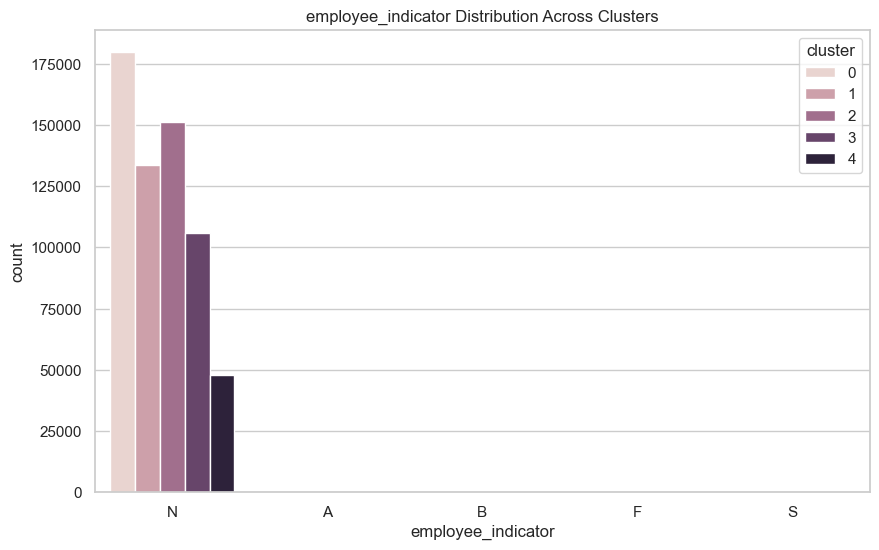

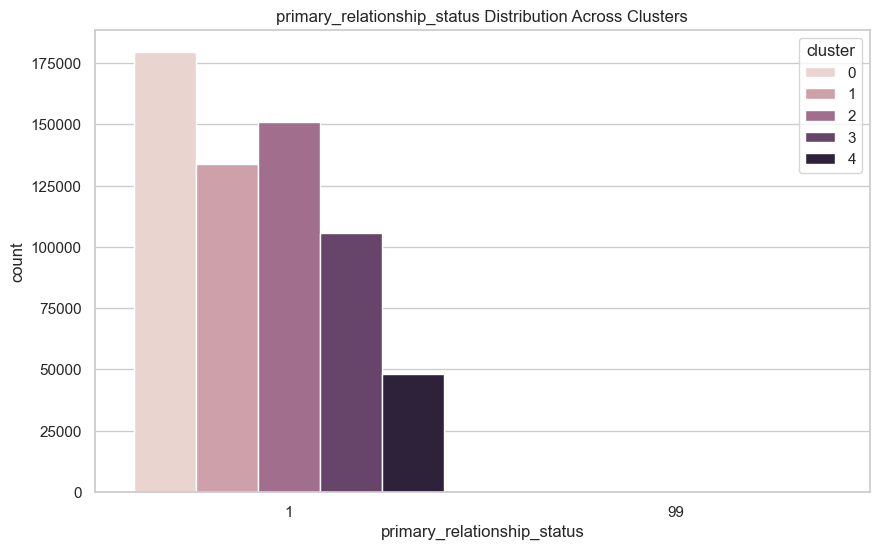

In [79]:
categorical_features = ['gender', 'employee_indicator', 'primary_relationship_status']
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature, hue='cluster', data=df_renamed)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()


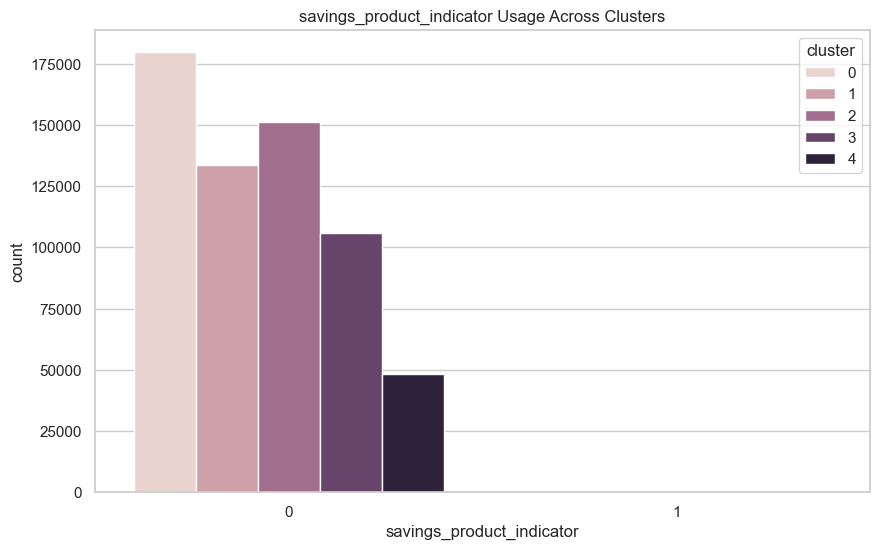

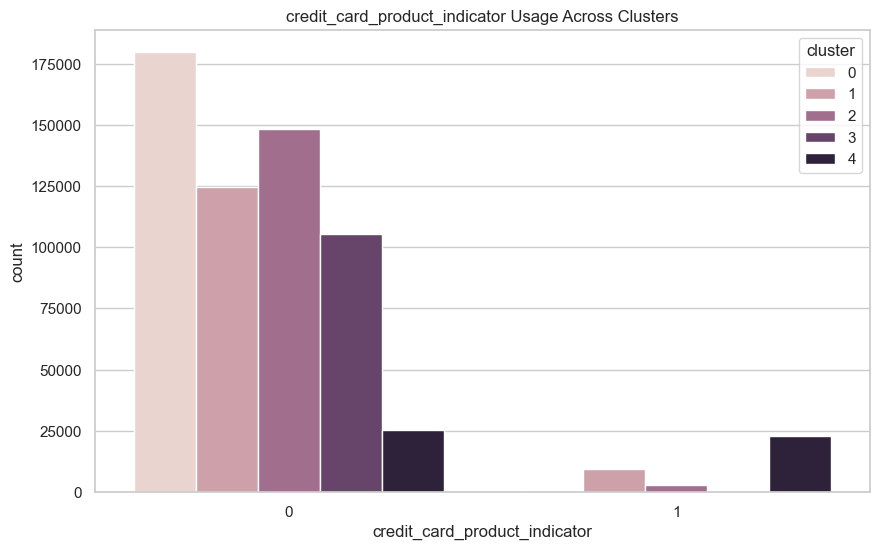

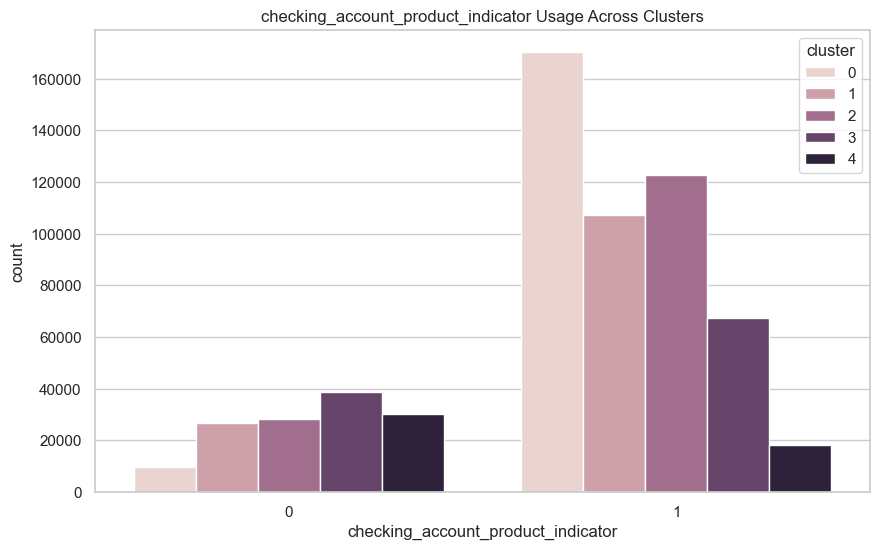

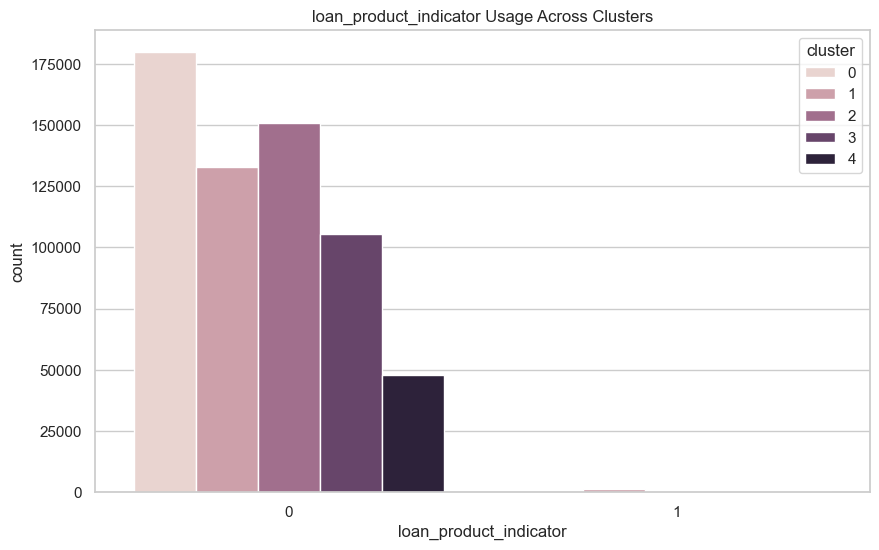

In [80]:
product_columns = [
    'savings_product_indicator', 'credit_card_product_indicator', 
    'checking_account_product_indicator', 'loan_product_indicator'
]
for product in product_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=product, hue='cluster', data=df_renamed)
    plt.title(f'{product} Usage Across Clusters')
    plt.show()


In [81]:
cluster_summary = df_renamed.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'age': 'mean',
    'income': 'mean',
    'seniority': 'mean'
}).reset_index()

print(cluster_summary)


   cluster              recency            frequency       monetary_value  \
0        0                99.99                 1.01            111062.39   
1        1                 0.00                 2.19            299271.06   
2        2                 0.02                 1.48            170320.31   
3        3               100.00                 1.07            145878.37   
4        4                 0.23                 6.04           1090769.62   

                   age               income            seniority  
0                26.14            109712.25                31.52  
1                54.56            139744.68               141.20  
2                31.79            115876.07                36.07  
3                55.79            136945.51               137.27  
4                48.36            206112.84               148.10  


Cluster 0:

Recency: 99.99 (They haven't engaged recently).
Frequency: 1.01 (Low engagement or transactions).
Monetary Value: 111,062.39 (Lower monetary value).
Age: 26.14 (Younger customers).
Income: 109,712.25 (Relatively lower income).
Seniority: 31.52 (Newer customers, lower tenure).
Updated Name: "Young Low-Engagement Customers"

Cluster 1:

Recency: 0.00 (Engaged very recently).
Frequency: 2.19 (Moderate engagement).
Monetary Value: 299,271.06 (Higher monetary value).
Age: 54.56 (Older customers).
Income: 139,744.68 (Higher income).
Seniority: 141.20 (Very senior customers, high tenure).
Updated Name: "Senior High-Spending Recently Engaged Customers"

Cluster 2:

Recency: 0.02 (Engaged recently).
Frequency: 1.48 (Moderate engagement).
Monetary Value: 170,320.31 (Moderate monetary value).
Age: 31.79 (Younger to middle-aged customers).
Income: 115,876.07 (Moderate income).
Seniority: 36.07 (Relatively newer customers).
Updated Name: "Moderately Engaged Young-Middle Customers"

Cluster 3:

Recency: 100.00 (No recent engagement).
Frequency: 1.07 (Low engagement).
Monetary Value: 145,878.37 (Moderate monetary value).
Age: 55.79 (Older customers).
Income: 136,945.51 (Moderate-high income).
Seniority: 137.27 (Highly senior customers, long tenure).
Updated Name: "Older Low-Engagement Customers"

Cluster 4:

Recency: 0.23 (Very recent engagement).
Frequency: 6.04 (Very frequent engagement).
Monetary Value: 1,090,769.62 (Very high monetary value).
Age: 48.36 (Middle-aged customers).
Income: 206,112.84 (Very high income).
Seniority: 148.10 (Very senior customers, long tenure).
Updated Name: "High-Value Frequent Middle-Aged Customers"

Final Cluster Names:
Cluster 0: "Young Low-Engagement Customers"
Cluster 1: "Senior High-Spending Recently Engaged Customers"
Cluster 2: "Moderately Engaged Young-Middle Customers"
Cluster 3: "Older Low-Engagement Customers"
Cluster 4: "High-Value Frequent Middle-Aged Customers"


In [82]:
# Create a dictionary to map cluster numbers to cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Add a new column 'cluster_name' to the DataFrame by mapping the 'cluster' column
df_renamed['cluster_name'] = df_renamed['cluster'].map(cluster_names)

# Display the DataFrame with the new column
df_renamed[['customer_id', 'cluster', 'cluster_name', 'customer_activity_index']].head()


customer_id  cluster                               cluster_name  \
0      1375586        2  Moderately Engaged Young-Middle Customers   
1      1050611        0             Young Low-Engagement Customers   
2      1050612        0             Young Low-Engagement Customers   
3      1050613        0             Young Low-Engagement Customers   
4      1050614        2  Moderately Engaged Young-Middle Customers   

   customer_activity_index  
0                        1  
1                        0  
2                        0  
3                        0  
4                        1

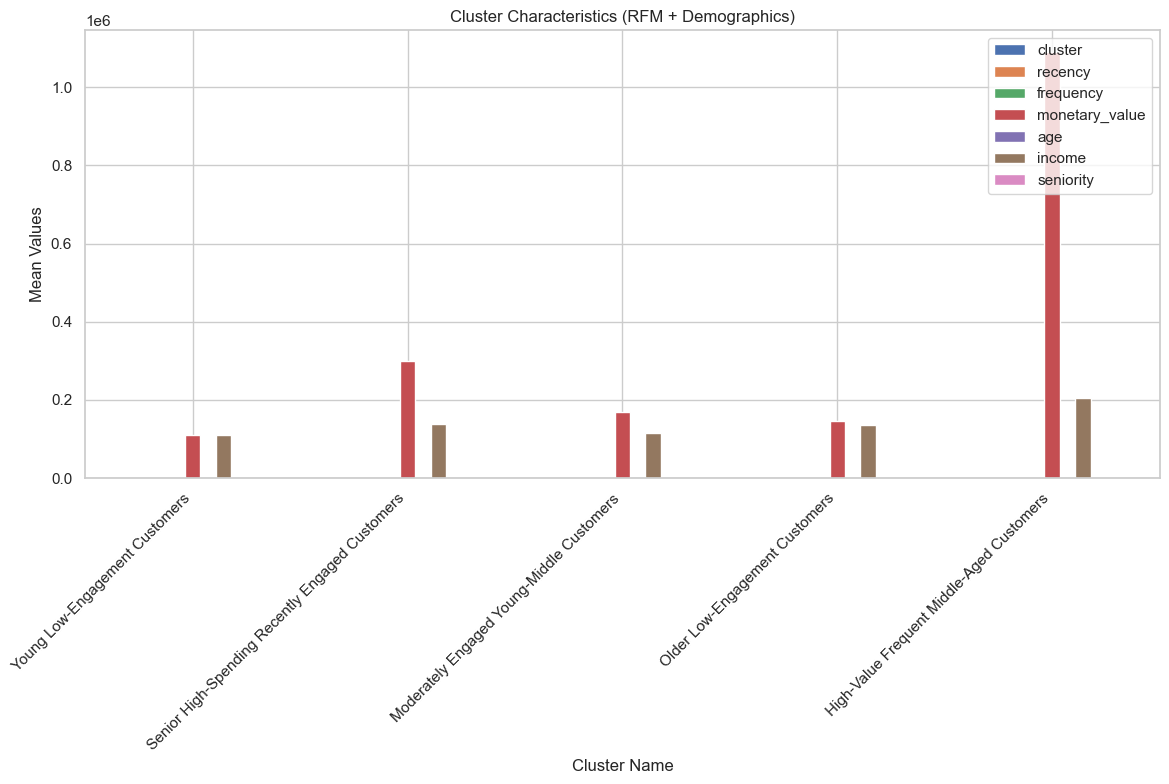

In [83]:
# Create a dictionary to map cluster numbers to cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Map cluster numbers to names in the cluster_summary DataFrame
cluster_summary['cluster_name'] = cluster_summary['cluster'].map(cluster_names)

# Set the 'cluster_name' column as the index
cluster_summary.set_index('cluster_name', inplace=True)

# Bar plot of the cluster summary using cluster names
cluster_summary.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Characteristics (RFM + Demographics)')
plt.ylabel('Mean Values')
plt.xlabel('Cluster Name')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels for better readability
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
# List of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Create a list to hold product usage counts for each cluster
product_usage_list = []

# Calculate the number of customers using each product in each cluster
for product in product_indicators:
    product_count = []
    for cluster in range(5):  # Loop through each cluster
        count = df_renamed[(df_renamed['cluster'] == cluster) & (df_renamed[product] == 1)].shape[0]  # Assuming 1 indicates usage
        product_count.append(count)
    
    # Append the product and its counts to the list
    product_usage_list.append({'Product': product, **{f'Cluster {i}': product_count[i] for i in range(5)}})

# Convert the list to a DataFrame
product_usage = pd.DataFrame(product_usage_list)

# Display the product usage table
print(product_usage)




                                  Product  Cluster 0  Cluster 1  Cluster 2  \
0               savings_product_indicator          0         37          0   
1             guarantee_product_indicator          0          1          0   
2      checking_account_product_indicator     170346     107269     122829   
3    derivative_account_product_indicator          1        136         18   
4       payroll_account_product_indicator        757       9148      13110   
5        junior_account_product_indicator       1493          1       6167   
6         young_account_product_indicator       1314       1146       4205   
7       payroll_pension_account_indicator        637      55218       1432   
8       pension_account_product_indicator       1724      11147       4121   
9    short_term_deposit_product_indicator        318        258        613   
10  medium_term_deposit_product_indicator          5        869        121   
11    long_term_deposit_product_indicator        174      18210 

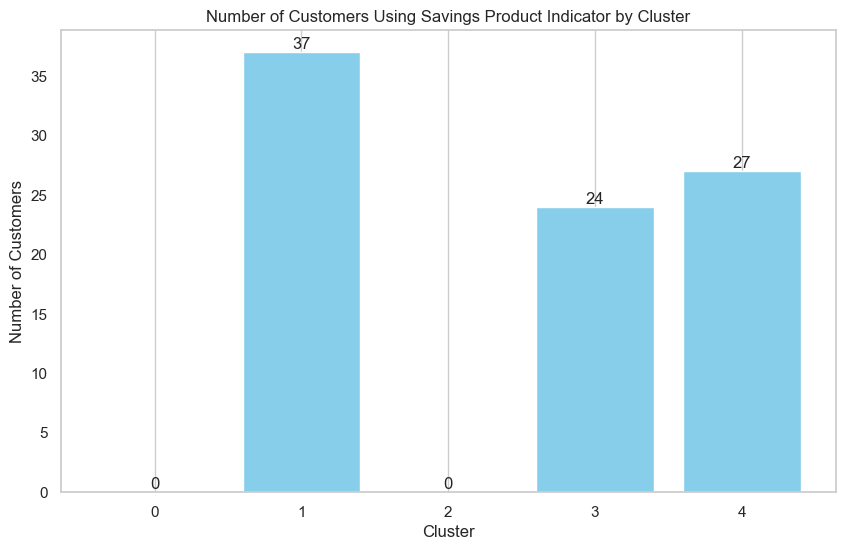

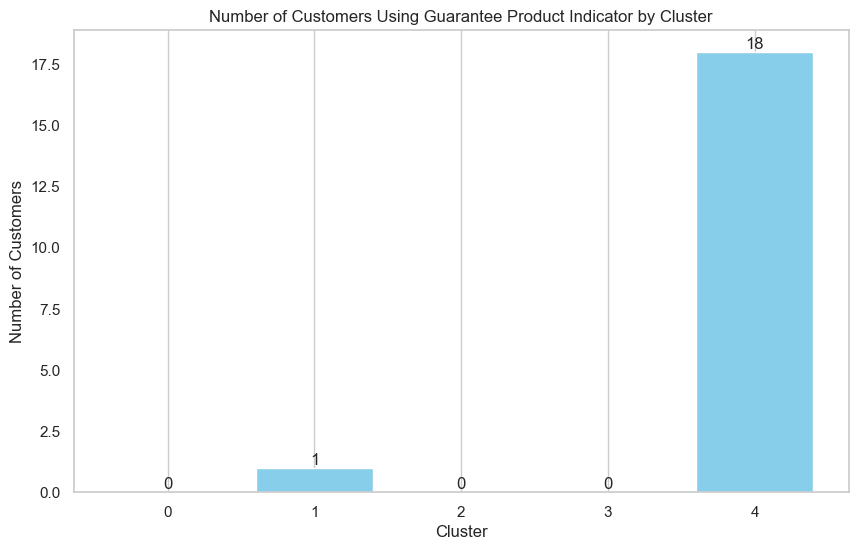

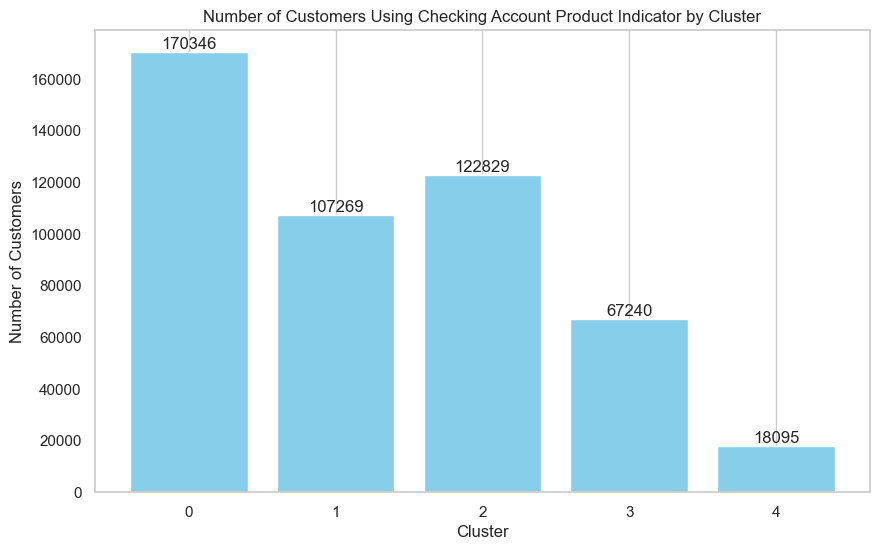

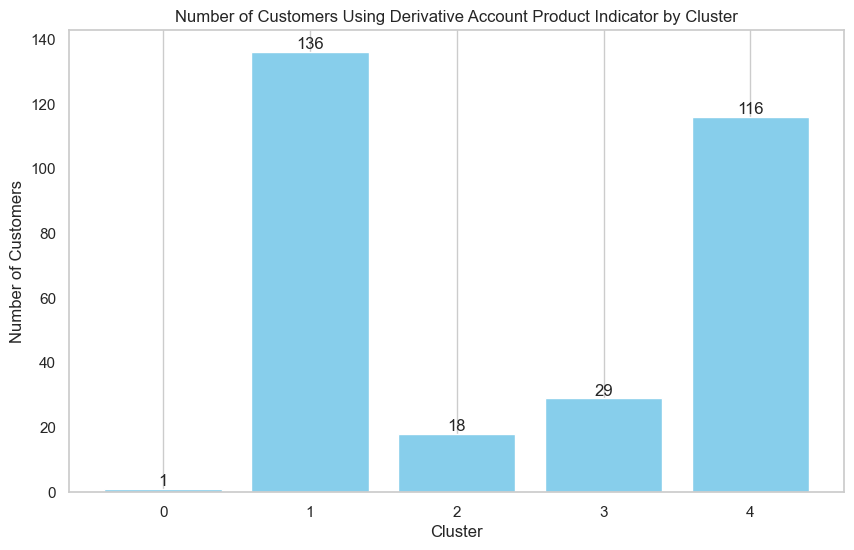

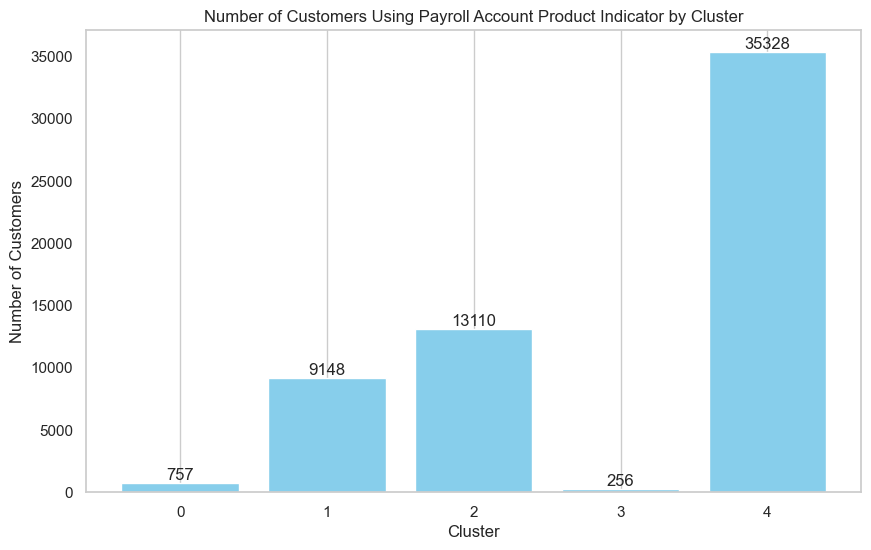

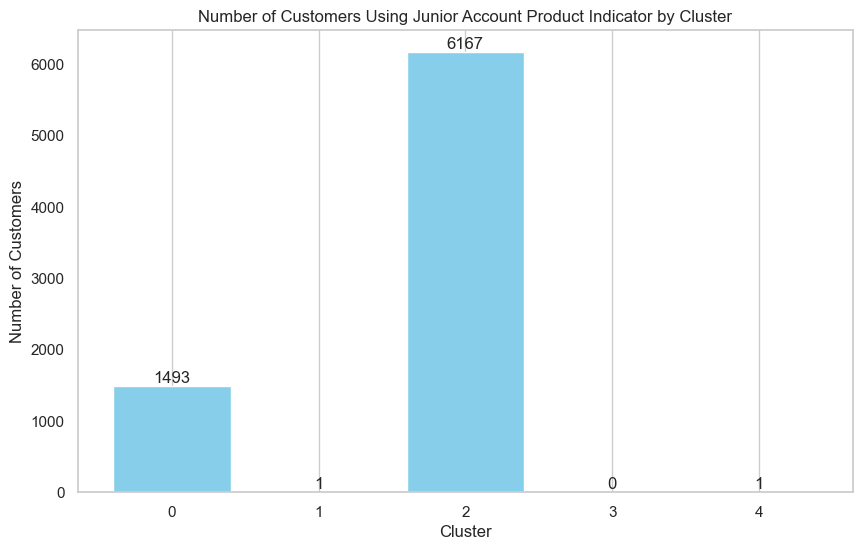

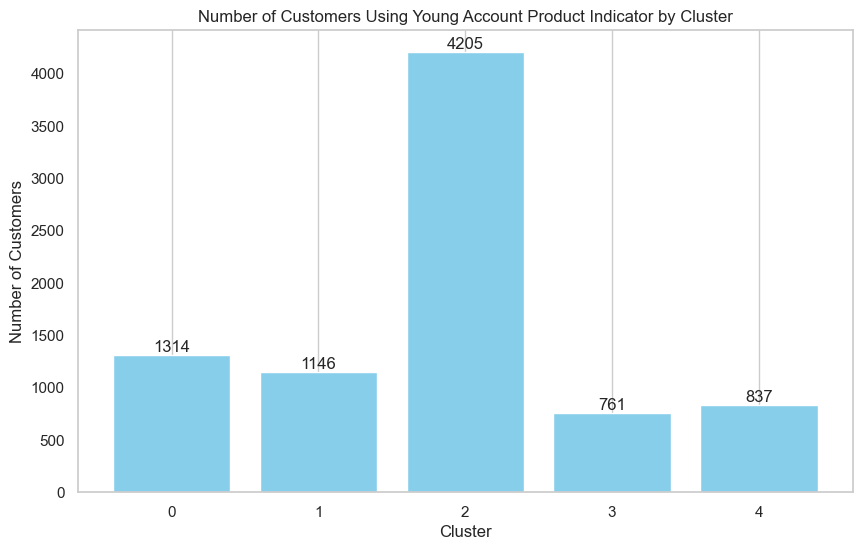

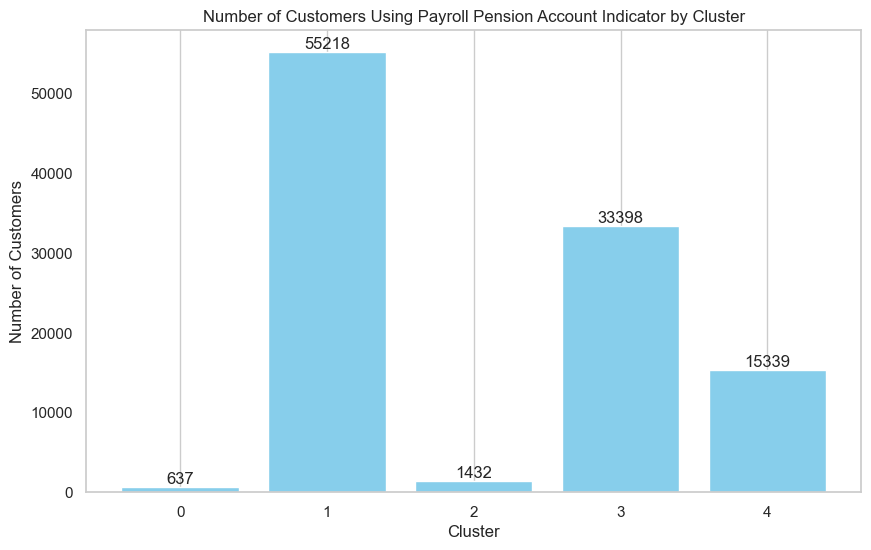

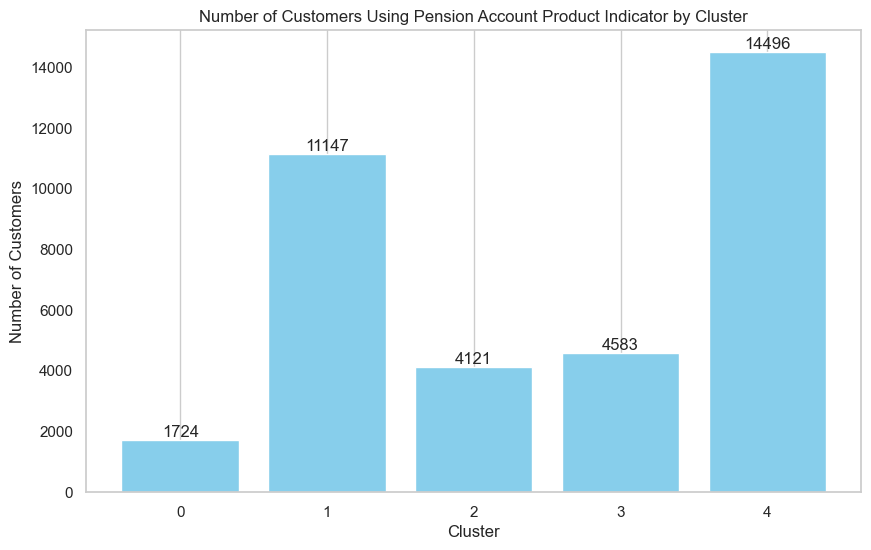

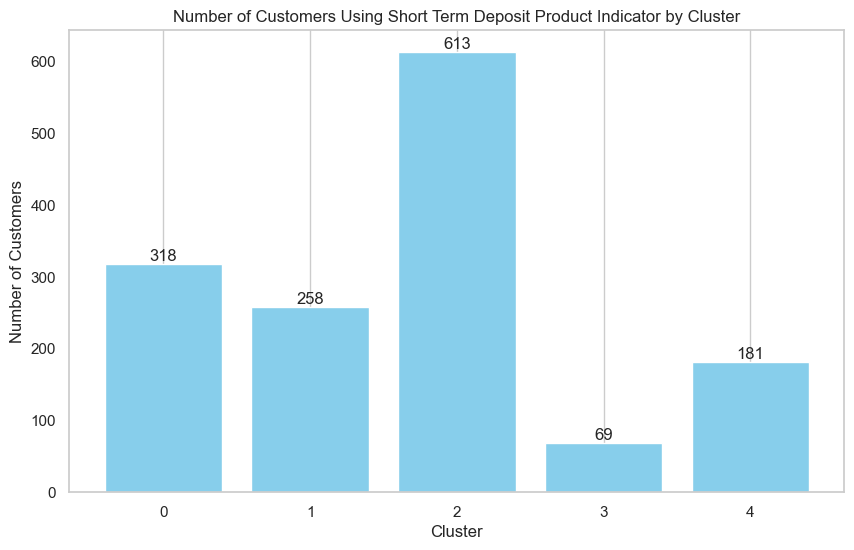

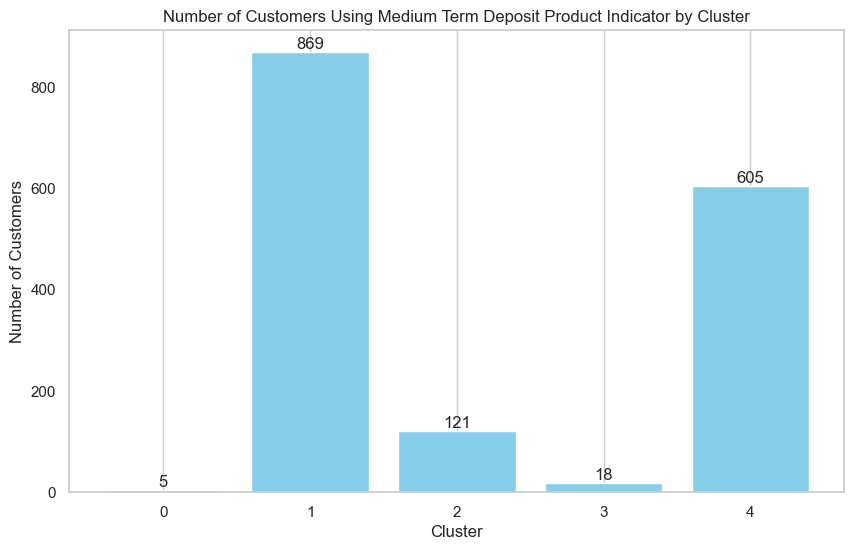

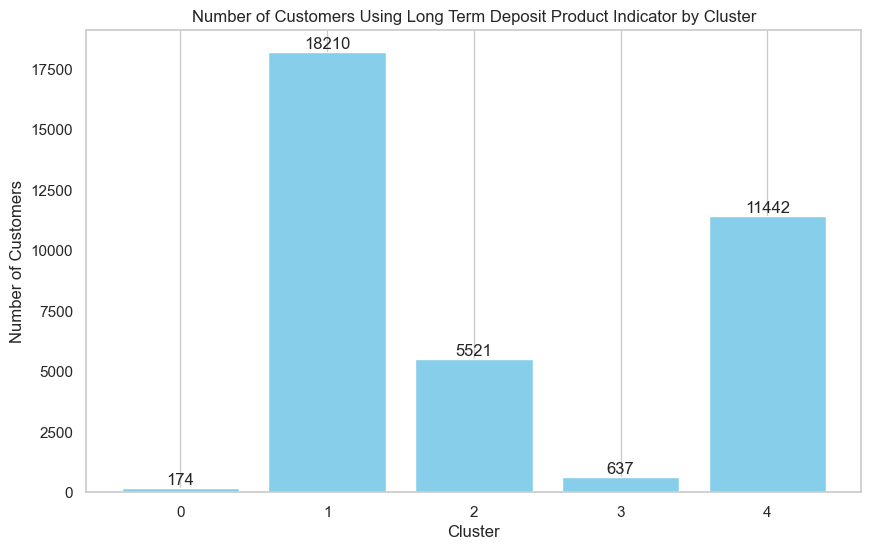

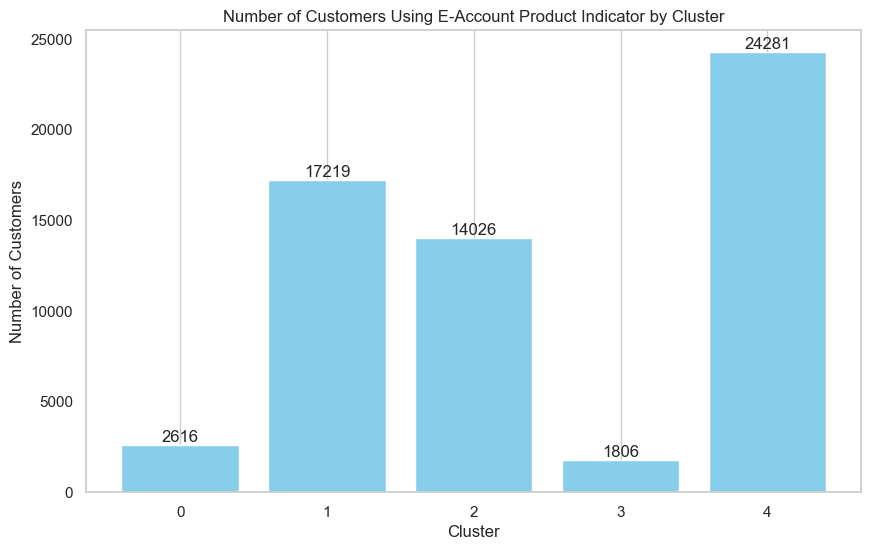

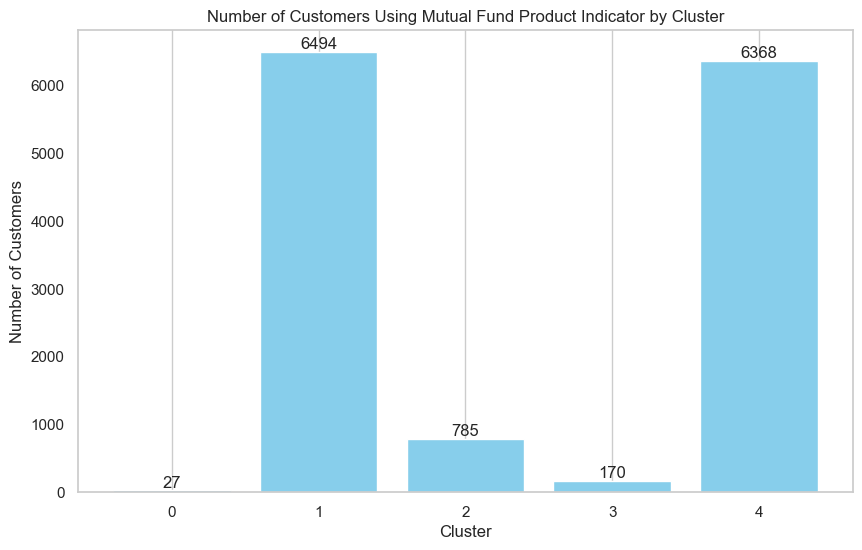

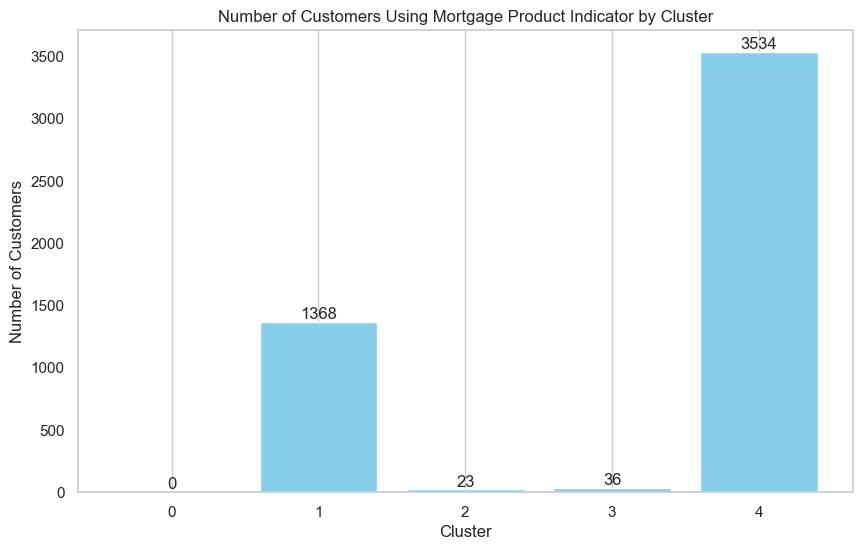

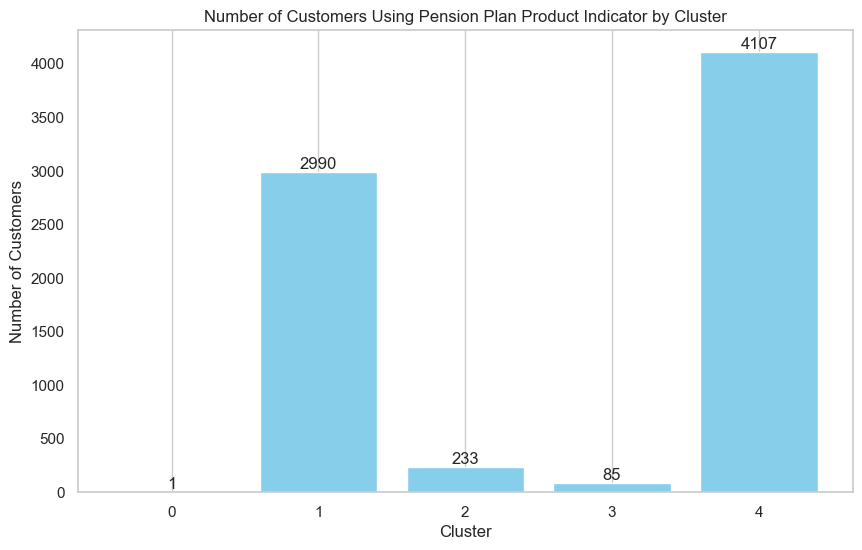

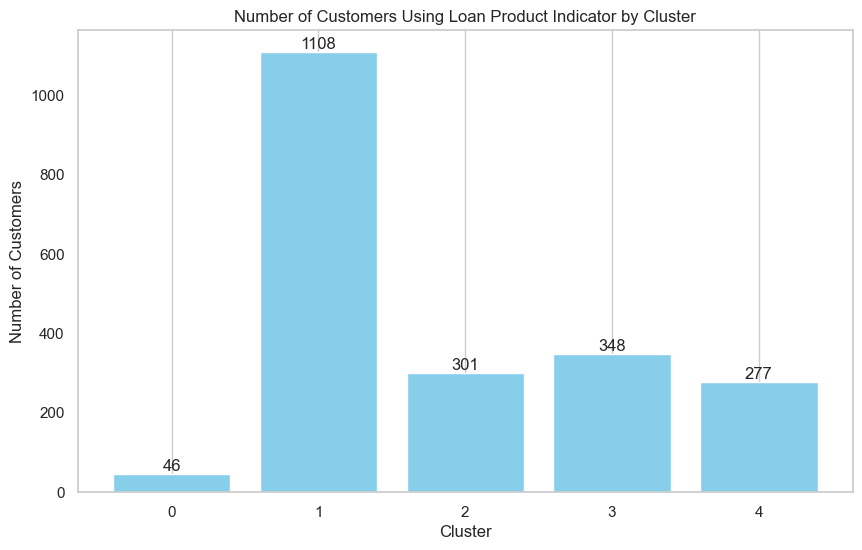

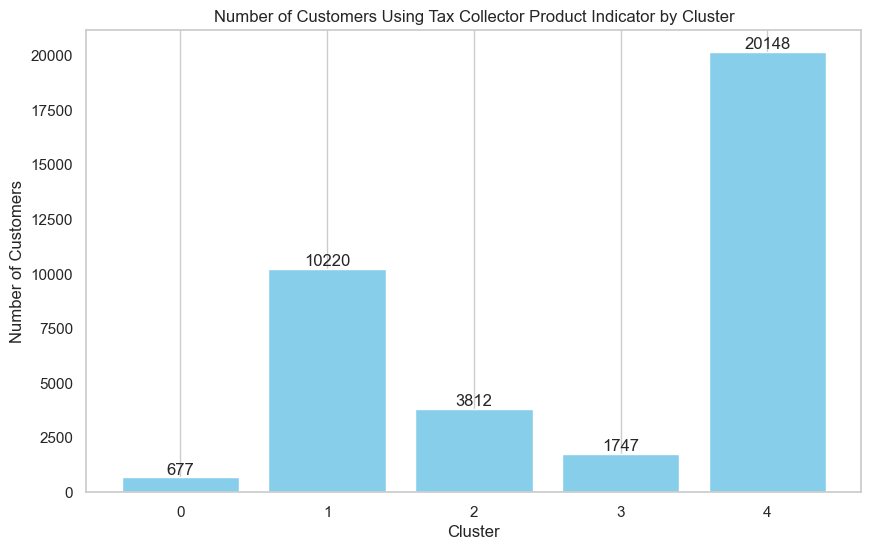

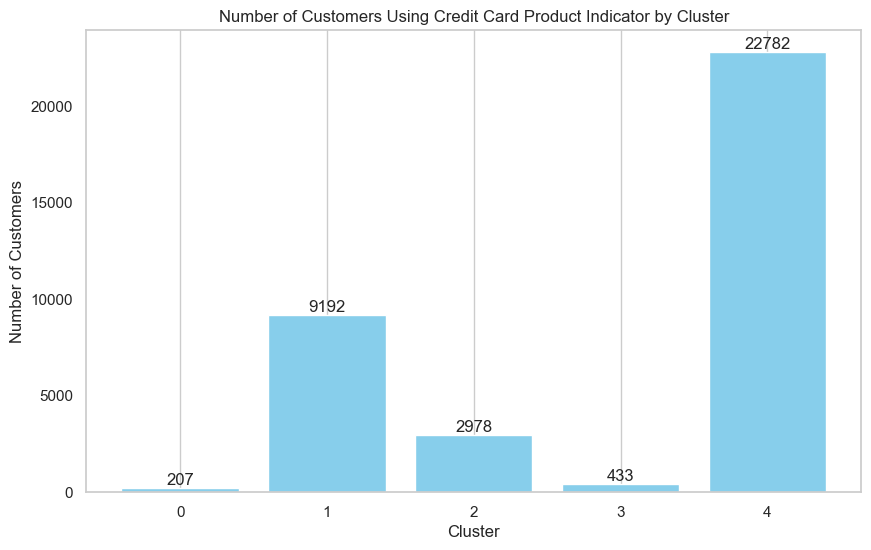

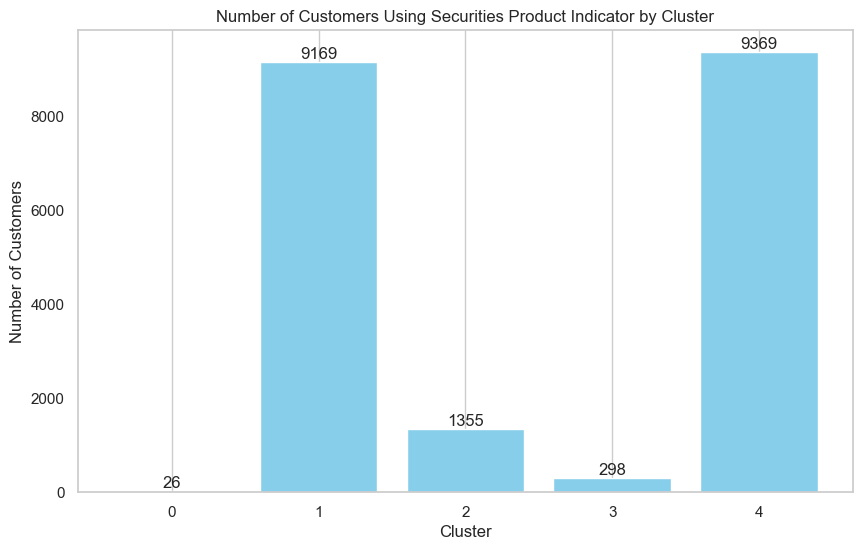

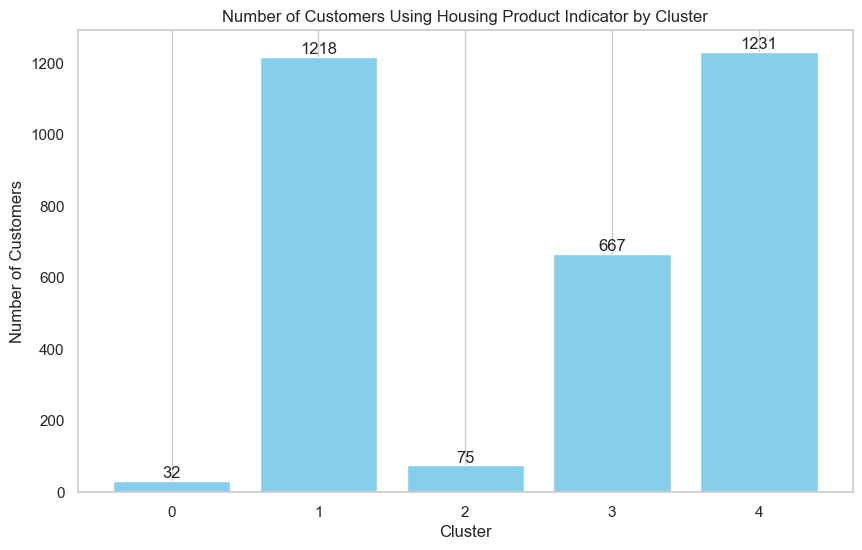

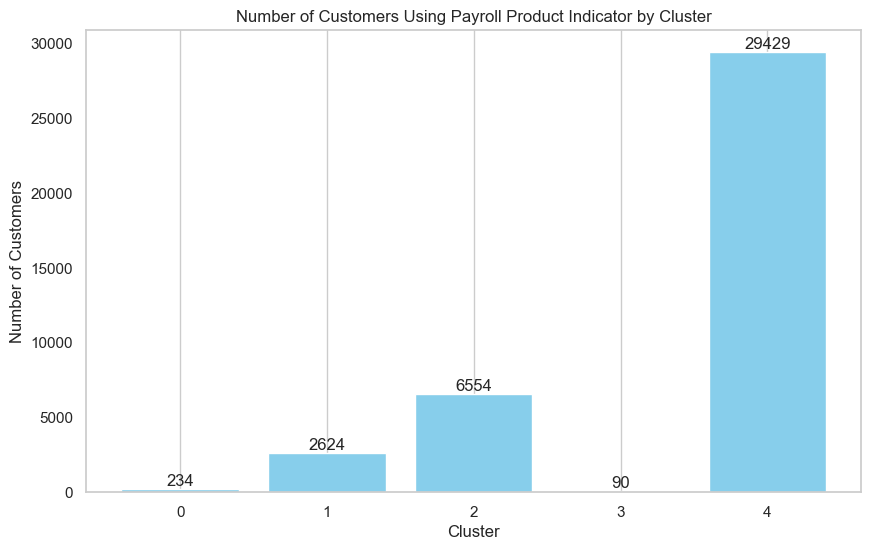

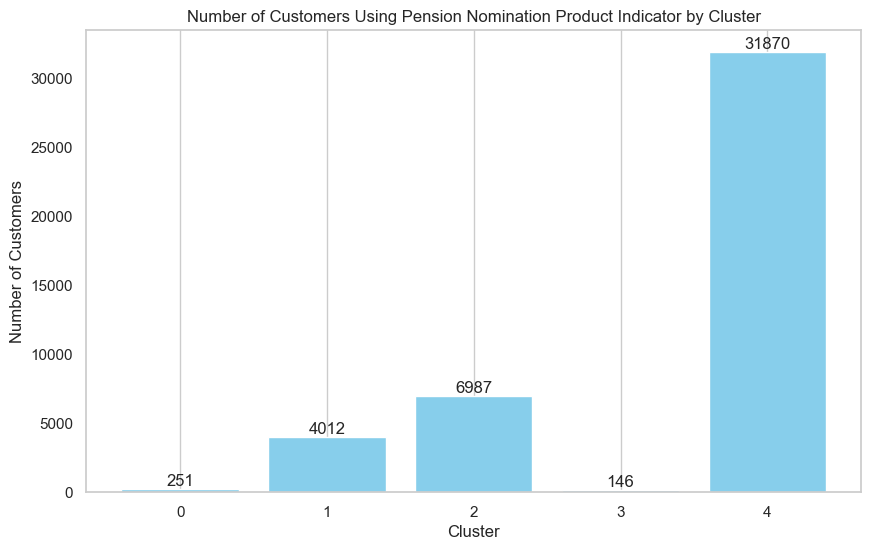

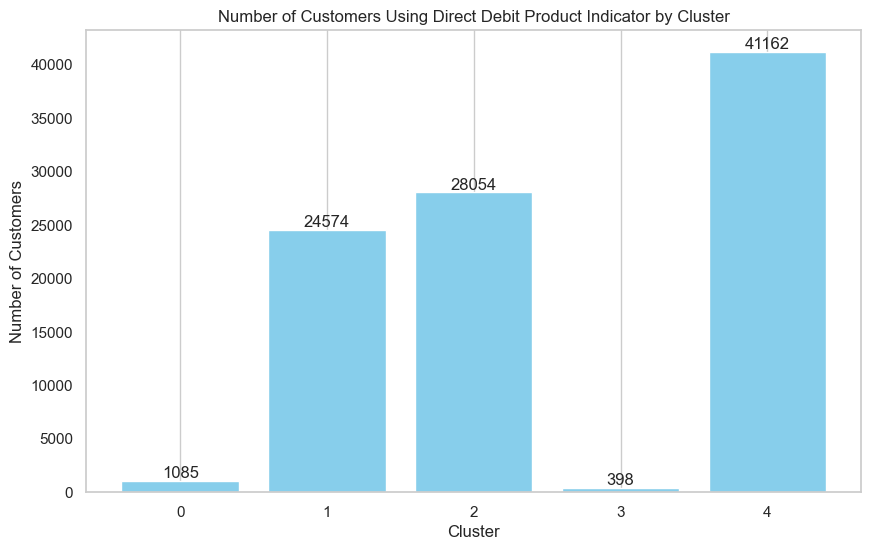

In [85]:
import matplotlib.pyplot as plt

# List of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Create a bar plot for each product indicator
for product in product_indicators:
    plt.figure(figsize=(10, 6))
    
    # Get count of customers using each product by cluster
    product_usage = df_renamed.groupby('cluster')[product].sum().reset_index()
    
    # Create bar plot
    bars = plt.bar(product_usage['cluster'], product_usage[product], color='skyblue')
    
    # Add markers on the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.title(f'Number of Customers Using {product.replace("_", " ").title()} by Cluster')
    plt.ylabel('Number of Customers')
    plt.xlabel('Cluster')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()


In [86]:
# Filter the DataFrame for Cluster 0
cluster_0_data = df_renamed[df_renamed['cluster'] == 0]

# Create a list to hold the product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in Cluster 0
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame for better readability
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Display the product distribution
print(product_distribution_df)


                                  Product  Number of Customers
0               savings_product_indicator                    0
1             guarantee_product_indicator                    0
2      checking_account_product_indicator               170346
3    derivative_account_product_indicator                    1
4       payroll_account_product_indicator                  757
5        junior_account_product_indicator                 1493
6         young_account_product_indicator                 1314
7       payroll_pension_account_indicator                  637
8       pension_account_product_indicator                 1724
9    short_term_deposit_product_indicator                  318
10  medium_term_deposit_product_indicator                    5
11    long_term_deposit_product_indicator                  174
12            e-account_product_indicator                 2616
13          mutual_fund_product_indicator                   27
14             mortgage_product_indicator              

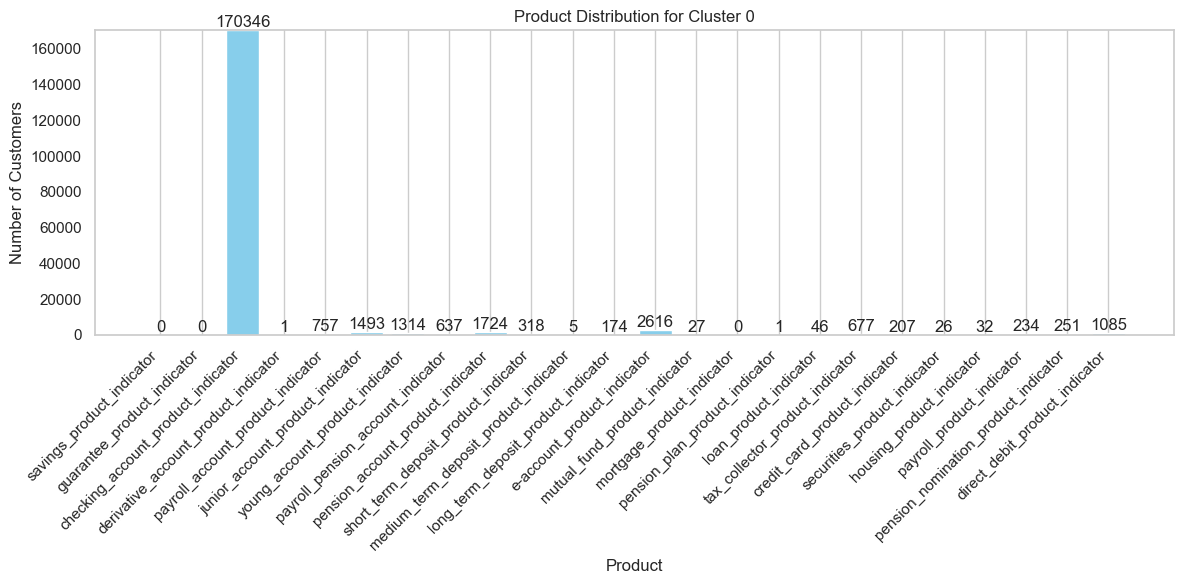

In [87]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Cluster 0
cluster_0_data = df_renamed[df_renamed['cluster'] == 0]

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in Cluster 0
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame for better readability
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Create a bar plot for the product distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(product_distribution_df['Product'], product_distribution_df['Number of Customers'], color='skyblue')

# Add markers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Formatting the plot
plt.title('Product Distribution for Cluster 0')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(product_distribution_df['Number of Customers']) + 5)  # Add a little space above the highest bar
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


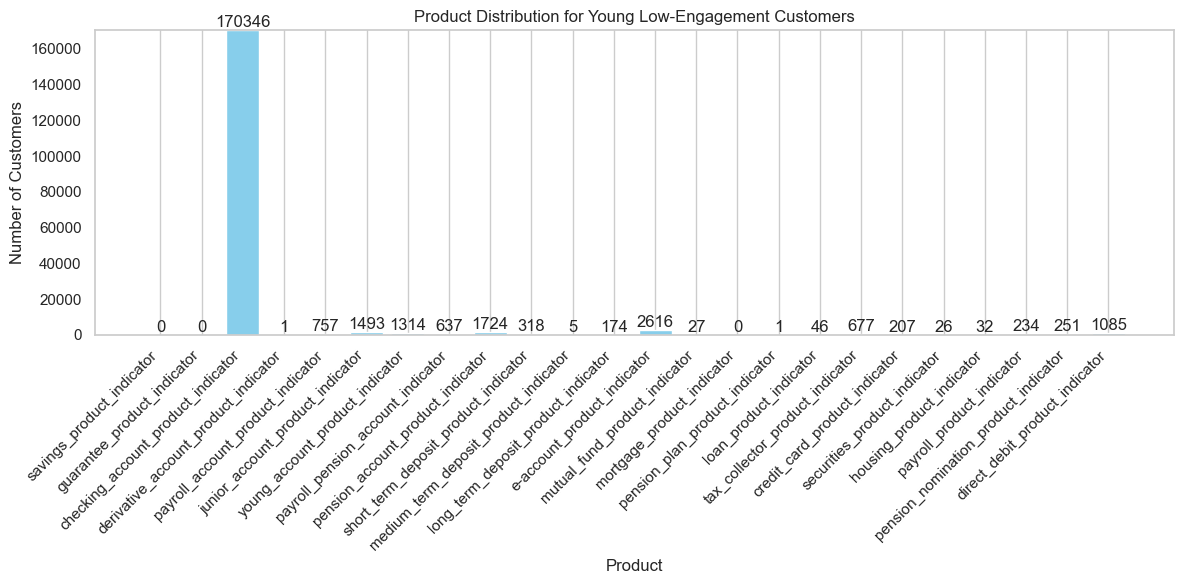

In [88]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Cluster 0
cluster_id = 0  # Change this to the desired cluster ID if needed
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in the specified cluster
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame for better readability
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Create a bar plot for the product distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(product_distribution_df['Product'], product_distribution_df['Number of Customers'], color='skyblue')

# Add markers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Formatting the plot
plt.title(f'Product Distribution for {cluster_names[cluster_id]}')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(product_distribution_df['Number of Customers']) + 5)  # Add a little space above the highest bar
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


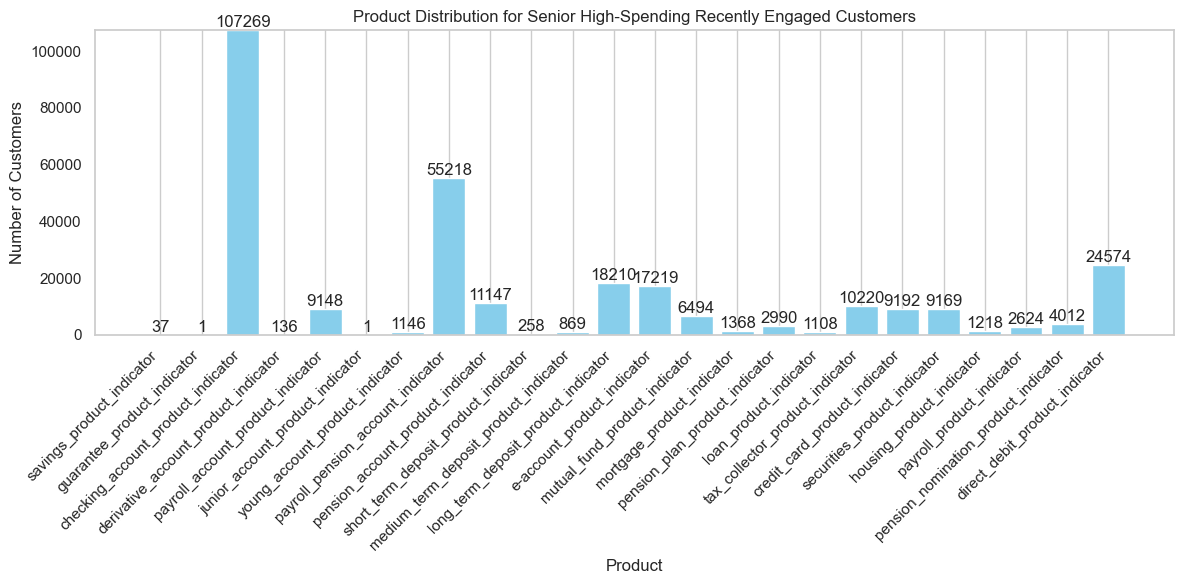

In [89]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Cluster 0
cluster_id = 1  # Change this to the desired cluster ID if needed
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in the specified cluster
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame for better readability
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Create a bar plot for the product distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(product_distribution_df['Product'], product_distribution_df['Number of Customers'], color='skyblue')

# Add markers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Formatting the plot
plt.title(f'Product Distribution for {cluster_names[cluster_id]}')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(product_distribution_df['Number of Customers']) + 5)  # Add a little space above the highest bar
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


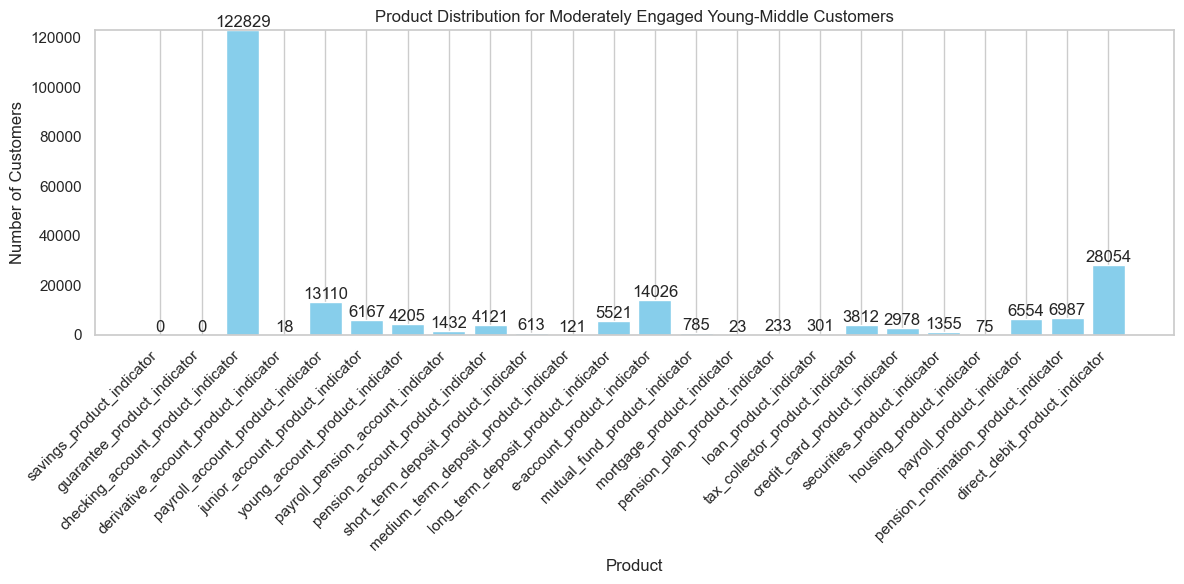

In [90]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Cluster 0
cluster_id = 2  # Change this to the desired cluster ID if needed
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Define the cluster names
cluster_names = {
   0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in the specified cluster
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame for better readability
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Create a bar plot for the product distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(product_distribution_df['Product'], product_distribution_df['Number of Customers'], color='skyblue')

# Add markers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Formatting the plot
plt.title(f'Product Distribution for {cluster_names[cluster_id]}')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(product_distribution_df['Number of Customers']) + 5)  # Add a little space above the highest bar
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


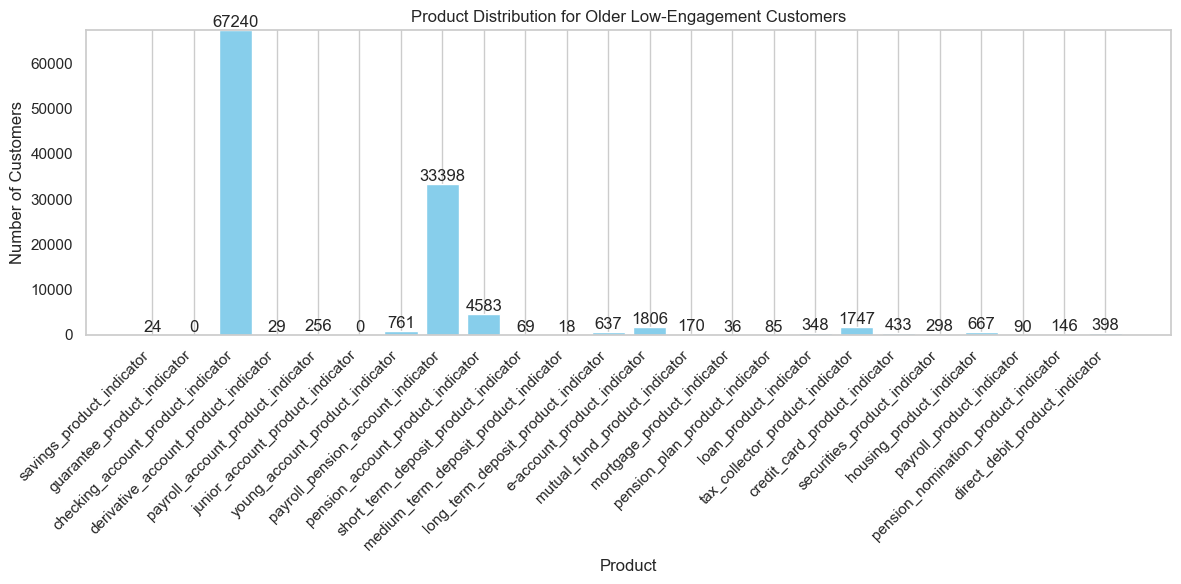

In [91]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Cluster 0
cluster_id = 3  # Change this to the desired cluster ID if needed
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Define the cluster names
cluster_names = {
   0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in the specified cluster
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame for better readability
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Create a bar plot for the product distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(product_distribution_df['Product'], product_distribution_df['Number of Customers'], color='skyblue')

# Add markers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Formatting the plot
plt.title(f'Product Distribution for {cluster_names[cluster_id]}')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(product_distribution_df['Number of Customers']) + 5)  # Add a little space above the highest bar
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


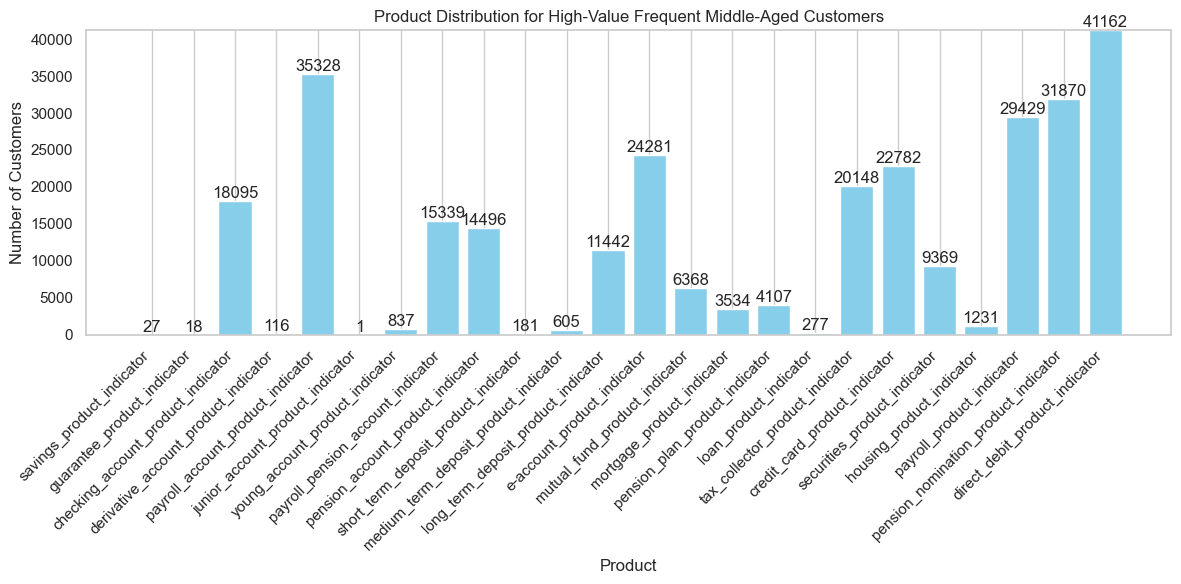

In [92]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Cluster 0
cluster_id = 4  # Change this to the desired cluster ID if needed
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in the specified cluster
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame for better readability
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Create a bar plot for the product distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(product_distribution_df['Product'], product_distribution_df['Number of Customers'], color='skyblue')

# Add markers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Formatting the plot
plt.title(f'Product Distribution for {cluster_names[cluster_id]}')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(product_distribution_df['Number of Customers']) + 5)  # Add a little space above the highest bar
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [93]:
import pandas as pd

# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Filter the DataFrame for Cluster 0
cluster_id = 0
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in Cluster 0
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Add cluster information to the DataFrame
product_distribution_df['Cluster Number'] = cluster_id
product_distribution_df['Cluster Name'] = cluster_names[cluster_id]

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Display the table
product_distribution_df


Cluster Number                    Cluster Name  \
0                0  Young Low-Engagement Customers   
1                0  Young Low-Engagement Customers   
2                0  Young Low-Engagement Customers   
3                0  Young Low-Engagement Customers   
4                0  Young Low-Engagement Customers   
5                0  Young Low-Engagement Customers   
6                0  Young Low-Engagement Customers   
7                0  Young Low-Engagement Customers   
8                0  Young Low-Engagement Customers   
9                0  Young Low-Engagement Customers   
10               0  Young Low-Engagement Customers   
11               0  Young Low-Engagement Customers   
12               0  Young Low-Engagement Customers   
13               0  Young Low-Engagement Customers   
14               0  Young Low-Engagement Customers   
15               0  Young Low-Engagement Customers   
16               0  Young Low-Engagement Customers   
17               0  Young Low-Engagement Customers   
18               0  Young Low-Engagement Customers   
19               0  Young Low-Engagement Customers   
20               0  Young Low-Engagement Customers   
21               0  Young Low-Engagement Customers   
22               0  Young Low-Engagement Customers   
23               0  Young Low-Engagement Customers   

                                  Product  Number of Customers  
0               savings_product_indicator                    0  
1             guarantee_product_indicator                    0  
2      checking_account_product_indicator               170346  
3    derivative_account_product_indicator                    1  
4       payroll_account_product_indicator                  757  
5        junior_account_product_indicator                 1493  
6         young_account_product_indicator                 1314  
7       payroll_pension_account_indicator                  637  
8       pension_account_product_indicator                 1724  
9    short_term_deposit_product_indicator                  318  
10  medium_term_deposit_product_indicator                    5  
11    long_term_deposit_product_indicator                  174  
12            e-account_product_indicator                 2616  
13          mutual_fund_product_indicator                   27  
14             mortgage_product_indicator                    0  
15         pension_plan_product_indicator                    1  
16                 loan_product_indicator                   46  
17        tax_collector_product_indicator                  677  
18          credit_card_product_indicator                  207  
19           securities_product_indicator                   26  
20              housing_product_indicator                   32  
21              payroll_product_indicator                  234  
22   pension_nomination_product_indicator                  251  
23         direct_debit_product_indicator                 1085

In [94]:
import pandas as pd

# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Filter the DataFrame for Cluster 0
cluster_id = 0
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in Cluster 0
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Add cluster information to the DataFrame
product_distribution_df['Cluster Number'] = cluster_id
product_distribution_df['Cluster Name'] = cluster_names[cluster_id]

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Sort the DataFrame by 'Number of Customers' in descending order
product_distribution_df = product_distribution_df.sort_values(by='Number of Customers', ascending=False)

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Display the table
product_distribution_df


Cluster Number                    Cluster Name  \
2                0  Young Low-Engagement Customers   
12               0  Young Low-Engagement Customers   
8                0  Young Low-Engagement Customers   
5                0  Young Low-Engagement Customers   
6                0  Young Low-Engagement Customers   
23               0  Young Low-Engagement Customers   
4                0  Young Low-Engagement Customers   
17               0  Young Low-Engagement Customers   
7                0  Young Low-Engagement Customers   
9                0  Young Low-Engagement Customers   
22               0  Young Low-Engagement Customers   
21               0  Young Low-Engagement Customers   
18               0  Young Low-Engagement Customers   
11               0  Young Low-Engagement Customers   
16               0  Young Low-Engagement Customers   
20               0  Young Low-Engagement Customers   
13               0  Young Low-Engagement Customers   
19               0  Young Low-Engagement Customers   
10               0  Young Low-Engagement Customers   
15               0  Young Low-Engagement Customers   
3                0  Young Low-Engagement Customers   
14               0  Young Low-Engagement Customers   
1                0  Young Low-Engagement Customers   
0                0  Young Low-Engagement Customers   

                                  Product  Number of Customers  
2      checking_account_product_indicator               170346  
12            e-account_product_indicator                 2616  
8       pension_account_product_indicator                 1724  
5        junior_account_product_indicator                 1493  
6         young_account_product_indicator                 1314  
23         direct_debit_product_indicator                 1085  
4       payroll_account_product_indicator                  757  
17        tax_collector_product_indicator                  677  
7       payroll_pension_account_indicator                  637  
9    short_term_deposit_product_indicator                  318  
22   pension_nomination_product_indicator                  251  
21              payroll_product_indicator                  234  
18          credit_card_product_indicator                  207  
11    long_term_deposit_product_indicator                  174  
16                 loan_product_indicator                   46  
20              housing_product_indicator                   32  
13          mutual_fund_product_indicator                   27  
19           securities_product_indicator                   26  
10  medium_term_deposit_product_indicator                    5  
15         pension_plan_product_indicator                    1  
3    derivative_account_product_indicator                    1  
14             mortgage_product_indicator                    0  
1             guarantee_product_indicator                    0  
0               savings_product_indicator                    0

In [95]:
# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Filter the DataFrame for Cluster 1
cluster_id = 1
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in Cluster 0
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Add cluster information to the DataFrame
product_distribution_df['Cluster Number'] = cluster_id
product_distribution_df['Cluster Name'] = cluster_names[cluster_id]

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Sort the DataFrame by 'Number of Customers' in descending order
product_distribution_df = product_distribution_df.sort_values(by='Number of Customers', ascending=False)

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Display the table
product_distribution_df

Cluster Number                                     Cluster Name  \
2                1  Senior High-Spending Recently Engaged Customers   
7                1  Senior High-Spending Recently Engaged Customers   
23               1  Senior High-Spending Recently Engaged Customers   
11               1  Senior High-Spending Recently Engaged Customers   
12               1  Senior High-Spending Recently Engaged Customers   
8                1  Senior High-Spending Recently Engaged Customers   
17               1  Senior High-Spending Recently Engaged Customers   
18               1  Senior High-Spending Recently Engaged Customers   
19               1  Senior High-Spending Recently Engaged Customers   
4                1  Senior High-Spending Recently Engaged Customers   
13               1  Senior High-Spending Recently Engaged Customers   
22               1  Senior High-Spending Recently Engaged Customers   
15               1  Senior High-Spending Recently Engaged Customers   
21               1  Senior High-Spending Recently Engaged Customers   
14               1  Senior High-Spending Recently Engaged Customers   
20               1  Senior High-Spending Recently Engaged Customers   
6                1  Senior High-Spending Recently Engaged Customers   
16               1  Senior High-Spending Recently Engaged Customers   
10               1  Senior High-Spending Recently Engaged Customers   
9                1  Senior High-Spending Recently Engaged Customers   
3                1  Senior High-Spending Recently Engaged Customers   
0                1  Senior High-Spending Recently Engaged Customers   
1                1  Senior High-Spending Recently Engaged Customers   
5                1  Senior High-Spending Recently Engaged Customers   

                                  Product  Number of Customers  
2      checking_account_product_indicator               107269  
7       payroll_pension_account_indicator                55218  
23         direct_debit_product_indicator                24574  
11    long_term_deposit_product_indicator                18210  
12            e-account_product_indicator                17219  
8       pension_account_product_indicator                11147  
17        tax_collector_product_indicator                10220  
18          credit_card_product_indicator                 9192  
19           securities_product_indicator                 9169  
4       payroll_account_product_indicator                 9148  
13          mutual_fund_product_indicator                 6494  
22   pension_nomination_product_indicator                 4012  
15         pension_plan_product_indicator                 2990  
21              payroll_product_indicator                 2624  
14             mortgage_product_indicator                 1368  
20              housing_product_indicator                 1218  
6         young_account_product_indicator                 1146  
16                 loan_product_indicator                 1108  
10  medium_term_deposit_product_indicator                  869  
9    short_term_deposit_product_indicator                  258  
3    derivative_account_product_indicator                  136  
0               savings_product_indicator                   37  
1             guarantee_product_indicator                    1  
5        junior_account_product_indicator                    1

In [96]:
# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Filter the DataFrame for Cluster 2
cluster_id = 2
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in Cluster 0
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Add cluster information to the DataFrame
product_distribution_df['Cluster Number'] = cluster_id
product_distribution_df['Cluster Name'] = cluster_names[cluster_id]

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Sort the DataFrame by 'Number of Customers' in descending order
product_distribution_df = product_distribution_df.sort_values(by='Number of Customers', ascending=False)

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Display the table
product_distribution_df

Cluster Number                               Cluster Name  \
2                2  Moderately Engaged Young-Middle Customers   
23               2  Moderately Engaged Young-Middle Customers   
12               2  Moderately Engaged Young-Middle Customers   
4                2  Moderately Engaged Young-Middle Customers   
22               2  Moderately Engaged Young-Middle Customers   
21               2  Moderately Engaged Young-Middle Customers   
5                2  Moderately Engaged Young-Middle Customers   
11               2  Moderately Engaged Young-Middle Customers   
6                2  Moderately Engaged Young-Middle Customers   
8                2  Moderately Engaged Young-Middle Customers   
17               2  Moderately Engaged Young-Middle Customers   
18               2  Moderately Engaged Young-Middle Customers   
7                2  Moderately Engaged Young-Middle Customers   
19               2  Moderately Engaged Young-Middle Customers   
13               2  Moderately Engaged Young-Middle Customers   
9                2  Moderately Engaged Young-Middle Customers   
16               2  Moderately Engaged Young-Middle Customers   
15               2  Moderately Engaged Young-Middle Customers   
10               2  Moderately Engaged Young-Middle Customers   
20               2  Moderately Engaged Young-Middle Customers   
14               2  Moderately Engaged Young-Middle Customers   
3                2  Moderately Engaged Young-Middle Customers   
1                2  Moderately Engaged Young-Middle Customers   
0                2  Moderately Engaged Young-Middle Customers   

                                  Product  Number of Customers  
2      checking_account_product_indicator               122829  
23         direct_debit_product_indicator                28054  
12            e-account_product_indicator                14026  
4       payroll_account_product_indicator                13110  
22   pension_nomination_product_indicator                 6987  
21              payroll_product_indicator                 6554  
5        junior_account_product_indicator                 6167  
11    long_term_deposit_product_indicator                 5521  
6         young_account_product_indicator                 4205  
8       pension_account_product_indicator                 4121  
17        tax_collector_product_indicator                 3812  
18          credit_card_product_indicator                 2978  
7       payroll_pension_account_indicator                 1432  
19           securities_product_indicator                 1355  
13          mutual_fund_product_indicator                  785  
9    short_term_deposit_product_indicator                  613  
16                 loan_product_indicator                  301  
15         pension_plan_product_indicator                  233  
10  medium_term_deposit_product_indicator                  121  
20              housing_product_indicator                   75  
14             mortgage_product_indicator                   23  
3    derivative_account_product_indicator                   18  
1             guarantee_product_indicator                    0  
0               savings_product_indicator                    0

In [97]:
# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Filter the DataFrame for Cluster 3
cluster_id = 3
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in Cluster 0
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Add cluster information to the DataFrame
product_distribution_df['Cluster Number'] = cluster_id
product_distribution_df['Cluster Name'] = cluster_names[cluster_id]

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Sort the DataFrame by 'Number of Customers' in descending order
product_distribution_df = product_distribution_df.sort_values(by='Number of Customers', ascending=False)

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Display the table
product_distribution_df

Cluster Number                    Cluster Name  \
2                3  Older Low-Engagement Customers   
7                3  Older Low-Engagement Customers   
8                3  Older Low-Engagement Customers   
12               3  Older Low-Engagement Customers   
17               3  Older Low-Engagement Customers   
6                3  Older Low-Engagement Customers   
20               3  Older Low-Engagement Customers   
11               3  Older Low-Engagement Customers   
18               3  Older Low-Engagement Customers   
23               3  Older Low-Engagement Customers   
16               3  Older Low-Engagement Customers   
19               3  Older Low-Engagement Customers   
4                3  Older Low-Engagement Customers   
13               3  Older Low-Engagement Customers   
22               3  Older Low-Engagement Customers   
21               3  Older Low-Engagement Customers   
15               3  Older Low-Engagement Customers   
9                3  Older Low-Engagement Customers   
14               3  Older Low-Engagement Customers   
3                3  Older Low-Engagement Customers   
0                3  Older Low-Engagement Customers   
10               3  Older Low-Engagement Customers   
1                3  Older Low-Engagement Customers   
5                3  Older Low-Engagement Customers   

                                  Product  Number of Customers  
2      checking_account_product_indicator                67240  
7       payroll_pension_account_indicator                33398  
8       pension_account_product_indicator                 4583  
12            e-account_product_indicator                 1806  
17        tax_collector_product_indicator                 1747  
6         young_account_product_indicator                  761  
20              housing_product_indicator                  667  
11    long_term_deposit_product_indicator                  637  
18          credit_card_product_indicator                  433  
23         direct_debit_product_indicator                  398  
16                 loan_product_indicator                  348  
19           securities_product_indicator                  298  
4       payroll_account_product_indicator                  256  
13          mutual_fund_product_indicator                  170  
22   pension_nomination_product_indicator                  146  
21              payroll_product_indicator                   90  
15         pension_plan_product_indicator                   85  
9    short_term_deposit_product_indicator                   69  
14             mortgage_product_indicator                   36  
3    derivative_account_product_indicator                   29  
0               savings_product_indicator                   24  
10  medium_term_deposit_product_indicator                   18  
1             guarantee_product_indicator                    0  
5        junior_account_product_indicator                    0

In [98]:
# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# Filter the DataFrame for Cluster 4
cluster_id = 4
cluster_0_data = df_renamed[df_renamed['cluster'] == cluster_id]

# Create a list of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate the number of customers using each product in Cluster 0
product_distribution = cluster_0_data[product_indicators].sum()

# Convert the result to a DataFrame
product_distribution_df = product_distribution.reset_index()
product_distribution_df.columns = ['Product', 'Number of Customers']

# Add cluster information to the DataFrame
product_distribution_df['Cluster Number'] = cluster_id
product_distribution_df['Cluster Name'] = cluster_names[cluster_id]

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Sort the DataFrame by 'Number of Customers' in descending order
product_distribution_df = product_distribution_df.sort_values(by='Number of Customers', ascending=False)

# Reorder the columns for better readability
product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Display the table
product_distribution_df

Cluster Number                               Cluster Name  \
23               4  High-Value Frequent Middle-Aged Customers   
4                4  High-Value Frequent Middle-Aged Customers   
22               4  High-Value Frequent Middle-Aged Customers   
21               4  High-Value Frequent Middle-Aged Customers   
12               4  High-Value Frequent Middle-Aged Customers   
18               4  High-Value Frequent Middle-Aged Customers   
17               4  High-Value Frequent Middle-Aged Customers   
2                4  High-Value Frequent Middle-Aged Customers   
7                4  High-Value Frequent Middle-Aged Customers   
8                4  High-Value Frequent Middle-Aged Customers   
11               4  High-Value Frequent Middle-Aged Customers   
19               4  High-Value Frequent Middle-Aged Customers   
13               4  High-Value Frequent Middle-Aged Customers   
15               4  High-Value Frequent Middle-Aged Customers   
14               4  High-Value Frequent Middle-Aged Customers   
20               4  High-Value Frequent Middle-Aged Customers   
6                4  High-Value Frequent Middle-Aged Customers   
10               4  High-Value Frequent Middle-Aged Customers   
16               4  High-Value Frequent Middle-Aged Customers   
9                4  High-Value Frequent Middle-Aged Customers   
3                4  High-Value Frequent Middle-Aged Customers   
0                4  High-Value Frequent Middle-Aged Customers   
1                4  High-Value Frequent Middle-Aged Customers   
5                4  High-Value Frequent Middle-Aged Customers   

                                  Product  Number of Customers  
23         direct_debit_product_indicator                41162  
4       payroll_account_product_indicator                35328  
22   pension_nomination_product_indicator                31870  
21              payroll_product_indicator                29429  
12            e-account_product_indicator                24281  
18          credit_card_product_indicator                22782  
17        tax_collector_product_indicator                20148  
2      checking_account_product_indicator                18095  
7       payroll_pension_account_indicator                15339  
8       pension_account_product_indicator                14496  
11    long_term_deposit_product_indicator                11442  
19           securities_product_indicator                 9369  
13          mutual_fund_product_indicator                 6368  
15         pension_plan_product_indicator                 4107  
14             mortgage_product_indicator                 3534  
20              housing_product_indicator                 1231  
6         young_account_product_indicator                  837  
10  medium_term_deposit_product_indicator                  605  
16                 loan_product_indicator                  277  
9    short_term_deposit_product_indicator                  181  
3    derivative_account_product_indicator                  116  
0               savings_product_indicator                   27  
1             guarantee_product_indicator                   18  
5        junior_account_product_indicator                    1

In [99]:
df_renamed.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

In [100]:
# Save df_renamed DataFrame to a CSV file
df_renamed.to_csv('df_renamed.csv', index=False)


In [101]:
# Calculate the total sum of the monetary_value column
total_monetary_value = df_renamed['monetary_value'].sum()

# Display the result
print(f"Total Monetary Value of all customers: {total_monetary_value}")


Total Monetary Value of all customers: 153820909592.73


In [102]:
import pandas as pd

# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# List of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Loop through all clusters to generate and save CSV files
for cluster_id, cluster_name in cluster_names.items():
    # Filter the DataFrame for the current cluster
    cluster_data = df_renamed[df_renamed['cluster'] == cluster_id]
    
    # Calculate the number of customers using each product in the current cluster
    product_distribution = cluster_data[product_indicators].sum()
    
    # Convert the result to a DataFrame
    product_distribution_df = product_distribution.reset_index()
    product_distribution_df.columns = ['Product', 'Number of Customers']
    
    # Add cluster information to the DataFrame
    product_distribution_df['Cluster Number'] = cluster_id
    product_distribution_df['Cluster Name'] = cluster_name
    
    # Reorder the columns for better readability
    product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]
    
    # Save the DataFrame as a CSV file
    csv_filename = f'cluster_{cluster_id}_product_distribution.csv'
    product_distribution_df.to_csv(csv_filename, index=False)
    print(f'CSV file saved as {csv_filename}')
    
    # Optionally display the DataFrame (if needed)
    # display(product_distribution_df)


CSV file saved as cluster_0_product_distribution.csv
CSV file saved as cluster_1_product_distribution.csv
CSV file saved as cluster_2_product_distribution.csv
CSV file saved as cluster_3_product_distribution.csv
CSV file saved as cluster_4_product_distribution.csv


In [103]:
# Check for duplicate customer_id entries
duplicate_count = df_renamed.duplicated(subset='customer_id', keep=False).sum()
print(f'Total Duplicate Customer IDs: {duplicate_count}')



Total Duplicate Customer IDs: 0


In [104]:
# Get a DataFrame with duplicate customer IDs and their counts
duplicate_customers = df_renamed[df_renamed.duplicated(subset='customer_id', keep=False)]
duplicate_counts = duplicate_customers['customer_id'].value_counts().reset_index()
duplicate_counts.columns = ['customer_id', 'count']

# Show top 10 duplicate customer IDs
print(duplicate_counts.head(10))


Empty DataFrame
Columns: [customer_id, count]
Index: []


In [105]:
unique_customers_count = df_renamed['customer_id'].nunique()
print(f"Unique Customers Count: {unique_customers_count}")


Unique Customers Count: 619174


In [106]:
# table with all clusters and products

import pandas as pd

# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# List of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Initialize an empty list to collect DataFrames
all_product_distributions = []

# Loop through all clusters to generate and accumulate product distributions
for cluster_id, cluster_name in cluster_names.items():
    # Filter the DataFrame for the current cluster
    cluster_data = df_renamed[df_renamed['cluster'] == cluster_id]
    
    # Calculate the number of customers using each product in the current cluster
    product_distribution = cluster_data[product_indicators].sum()
    
    # Convert the result to a DataFrame
    product_distribution_df = product_distribution.reset_index()
    product_distribution_df.columns = ['Product', 'Number of Customers']
    
    # Add cluster information to the DataFrame
    product_distribution_df['Cluster Number'] = cluster_id
    product_distribution_df['Cluster Name'] = cluster_name
    
    # Reorder the columns for better readability
    product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]
    
    # Append the DataFrame to the list
    all_product_distributions.append(product_distribution_df)

# Concatenate all the DataFrames in the list into a single DataFrame
final_product_distribution = pd.concat(all_product_distributions, ignore_index=True)

# Save the combined DataFrame as a single CSV file
final_csv_filename = 'all_clusters_product_distribution.csv'
final_product_distribution.to_csv(final_csv_filename, index=False)
print(f'CSV file saved as {final_csv_filename}')

# Optionally display the final combined DataFrame
# display(final_product_distribution)


CSV file saved as all_clusters_product_distribution.csv


In [107]:
all_clustters = pd.read_csv(r'C:\Users\steph\Downloads\Customer Segmentation\all_clusters_product_distribution.csv')

In [108]:
total_sum_from_distribution = all_clustters['Number of Customers'].sum()
print(f"Total from Product Distribution: {total_sum_from_distribution}")


Total from Product Distribution: 1103201


In [109]:
# Assuming 'df_cluster' is your DataFrame with cluster assignments
duplicates = df_renamed.groupby('customer_id')['cluster'].nunique()

# Filter to find customers appearing in more than one cluster
multiple_clusters = duplicates[duplicates > 1]

# Show customers that appear in multiple clusters
print(multiple_clusters)


Series([], Name: cluster, dtype: int64)


In [110]:
# Get customer IDs that appear in multiple clusters
customers_with_multiple_clusters = multiple_clusters.index.tolist()

# Filter the original DataFrame to see details of these customers
duplicate_customers_info = df_renamed[df_renamed['customer_id'].isin(customers_with_multiple_clusters)]

# Show the details
print(duplicate_customers_info)


Empty DataFrame
Columns: [data_date, customer_id, employee_indicator, country_of_residence, gender, age, signup_date, new_customer_indicator, seniority, primary_relationship_status, customer_type_at_month_start, customer_relation_type, resident_indicator, foreigner_indicator, entry_channel, deceased_indicator, address_type, customer_activity_index, income, savings_product_indicator, guarantee_product_indicator, checking_account_product_indicator, derivative_account_product_indicator, payroll_account_product_indicator, junior_account_product_indicator, young_account_product_indicator, payroll_pension_account_indicator, pension_account_product_indicator, short_term_deposit_product_indicator, medium_term_deposit_product_indicator, long_term_deposit_product_indicator, e-account_product_indicator, mutual_fund_product_indicator, mortgage_product_indicator, pension_plan_product_indicator, loan_product_indicator, tax_collector_product_indicator, credit_card_product_indicator, securities_produc

In [111]:
# Count how many unique customers belong to multiple clusters
num_customers_multiple_clusters = len(customers_with_multiple_clusters)
print(f'Number of customers in multiple clusters: {num_customers_multiple_clusters}')


Number of customers in multiple clusters: 0


In [112]:
all_clustters.columns

Index(['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers'], dtype='object')

In [113]:
all_clustters.head

<bound method NDFrame.head of      Cluster Number                               Cluster Name  \
0                 0             Young Low-Engagement Customers   
1                 0             Young Low-Engagement Customers   
2                 0             Young Low-Engagement Customers   
3                 0             Young Low-Engagement Customers   
4                 0             Young Low-Engagement Customers   
..              ...                                        ...   
115               4  High-Value Frequent Middle-Aged Customers   
116               4  High-Value Frequent Middle-Aged Customers   
117               4  High-Value Frequent Middle-Aged Customers   
118               4  High-Value Frequent Middle-Aged Customers   
119               4  High-Value Frequent Middle-Aged Customers   

                                  Product  Number of Customers  
0               savings_product_indicator                    0  
1             guarantee_product_indicator      

In [114]:
# Step 1: Extract unique products
unique_products = all_clustters['Product'].unique()

# Step 2: Create a mapping of unique product names to IDs
product_id_mapping = {product: idx + 1 for idx, product in enumerate(unique_products)}  # Starting ID from 1

# Step 3: Create a new column for Product ID based on the mapping
all_clustters['Product ID'] = all_clustters['Product'].map(product_id_mapping)

# Step 4: Count the number of unique products
unique_product_count = all_clustters['Product ID'].nunique()

# Step 5: Save or display the DataFrame
all_clustters.to_csv('all_clusters_with_product_ids.csv', index=False)

# Print the number of unique products
print(f"Number of Unique Products: {unique_product_count}")

# Print the updated DataFrame
print(all_clustters.head())

Number of Unique Products: 24
   Cluster Number                    Cluster Name  \
0               0  Young Low-Engagement Customers   
1               0  Young Low-Engagement Customers   
2               0  Young Low-Engagement Customers   
3               0  Young Low-Engagement Customers   
4               0  Young Low-Engagement Customers   

                                Product  Number of Customers  Product ID  
0             savings_product_indicator                    0           1  
1           guarantee_product_indicator                    0           2  
2    checking_account_product_indicator               170346           3  
3  derivative_account_product_indicator                    1           4  
4     payroll_account_product_indicator                  757           5  


                       count                 mean                  std  \
cluster                                                                  
0                  179959.00                26.14                 6.16   
1                  133911.00                54.56                13.44   
2                  151156.00                31.79                10.95   
3                  105966.00                55.79                14.20   
4                   48182.00                48.36                10.62   

                         min                  25%                  50%  \
cluster                                                                  
0                       3.00                22.00                24.00   
1                      20.00                44.00                51.00   
2                       2.00                23.00                30.00   
3                      23.00                45.00                52.00   
4                      20.00         

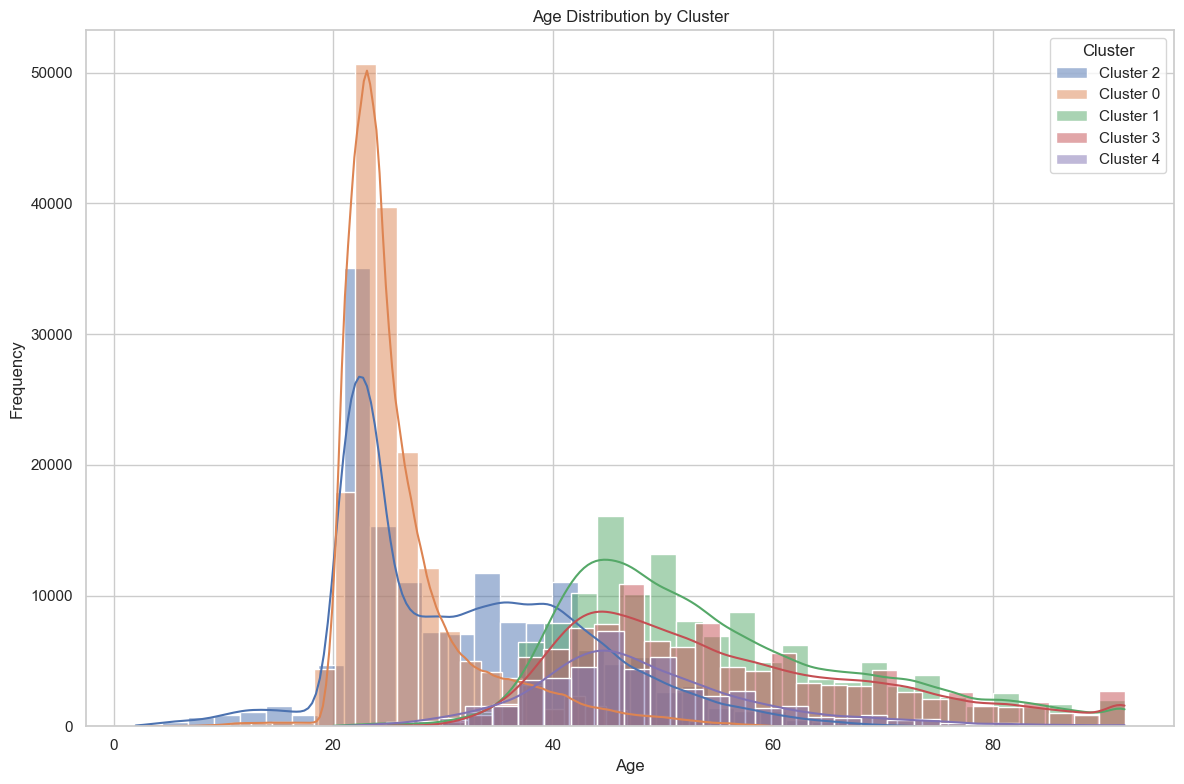

In [115]:
# Analyze age statistics for each cluster
age_stats_by_cluster = df_renamed.groupby('cluster')['age'].describe()

print(age_stats_by_cluster)  # This will show min, max, mean, etc., for each cluster

# Plot age distribution for each cluster
clusters = df_renamed['cluster'].unique()

plt.figure(figsize=(12, 8))

for cluster_id in clusters:
    cluster_data = df_renamed[df_renamed['cluster'] == cluster_id]
    
    # Plot age distribution for each cluster
    sns.histplot(cluster_data['age'], kde=True, label=f'Cluster {cluster_id}', bins=30)
    
# Add legend and labels
plt.legend(title='Cluster')
plt.title('Age Distribution by Cluster')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [116]:
import pandas as pd

# Define the age bins and labels
age_bins = [0, 20, 30, 40, 60, float('inf')]
age_labels = ['0-20 years', '21-30 years', '31-40 years', '41-60 years', '61+ years']

# Create a new column 'age_group' based on the age bins
df_renamed['age_group'] = pd.cut(df_renamed['age'], bins=age_bins, labels=age_labels, right=False)

# Display a sample of the new DataFrame with age groups
df_renamed[['age', 'age_group']].head()


age    age_group
0   35  31-40 years
1   23  21-30 years
2   23  21-30 years
3   22  21-30 years
4   23  21-30 years

In [117]:
# Create the new DataFrame df_renamed2 with the added 'age_group' column
df_renamed2 = df_renamed.copy()

# Save df_renamed2 to a CSV file
df_renamed2.to_csv('df_renamed2.csv', index=False)

# Verify by displaying a few rows
df_renamed2.head()


data_date  customer_id employee_indicator country_of_residence gender  age  \
0 2015-01-28      1375586                  N                   ES      H   35   
1 2015-01-28      1050611                  N                   ES      V   23   
2 2015-01-28      1050612                  N                   ES      V   23   
3 2015-01-28      1050613                  N                   ES      H   22   
4 2015-01-28      1050614                  N                   ES      V   23   

  signup_date  new_customer_indicator  seniority  primary_relationship_status  \
0  2015-01-12                       0          6                            1   
1  2012-08-10                       0         35                            1   
2  2012-08-10                       0         35                            1   
3  2012-08-10                       0         35                            1   
4  2012-08-10                       0         35                            1   

   customer_type_at_month_start customer_relation_type resident_indicator  \
0                             1                      A                  S   
1                             1                      I                  S   
2                             1                      I                  S   
3                             1                      I                  S   
4                             1                      A                  S   

  foreigner_indicator entry_channel deceased_indicator  address_type  \
0                   N           KHL                  N             1   
1                   S           KHE                  N             1   
2                   N           KHE                  N             1   
3                   N           KHD                  N             1   
4                   N           KHE                  N             1   

   customer_activity_index               income  savings_product_indicator  \
0                        1             87218.10                          0   
1                        0             35548.74                          0   
2                        0            122179.11                          0   
3                        0            119775.54                          0   
4                        1            106651.86                          0   

   guarantee_product_indicator  checking_account_product_indicator  \
0                            0                                   1   
1                            0                                   1   
2                            0                                   1   
3                            0                                   0   
4                            0                                   1   

   derivative_account_product_indicator  payroll_account_product_indicator  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   junior_account_product_indicator  young_account_product_indicator  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   payroll_pension_account_indicator  pension_account_product_indicator  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0     

In [118]:
df_renamed2.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

### Create Star Data model from master table

In [119]:
import pandas as pd

# Assuming df_renamed2 is already loaded

# Selecting the columns for the fact table
fact_table_columns = [
    'data_date',      # Date of the data (for time-based analysis)
    'signup_date',    # Date the customer signed up at the bank
    'customer_id',    # Unique ID for the customer
    'recency',        # Recency score for RFM analysis
    'frequency',      # Frequency score for RFM analysis
    'monetary_value', # Monetary value for RFM analysis
    'cluster',        # Cluster ID
    'cluster_name'    # Cluster name for easier identification
]

# Creating the fact table by selecting only the necessary columns
fact_table = df_renamed2[fact_table_columns].copy()

# Display the first few rows to confirm the new fact table
fact_table.head()


data_date signup_date  customer_id  recency  frequency  \
0 2015-01-28  2015-01-12      1375586        0          1   
1 2015-01-28  2012-08-10      1050611      100          1   
2 2015-01-28  2012-08-10      1050612      100          1   
3 2015-01-28  2012-08-10      1050613      100          1   
4 2015-01-28  2012-08-10      1050614        0          1   

        monetary_value  cluster                               cluster_name  
0             87218.10        2  Moderately Engaged Young-Middle Customers  
1             35548.74        0             Young Low-Engagement Customers  
2            122179.11        0             Young Low-Engagement Customers  
3            119775.54        0             Young Low-Engagement Customers  
4            106651.86        2  Moderately Engaged Young-Middle Customers

In [120]:
fact_table.to_csv('fact_table.csv', index=False)


In [121]:
# Selecting the columns for the customer dimension table
customer_dimension_columns = [
    'customer_id',              # Primary Key for the customer
    'signup_date',    # Date the customer signed up at the bank
    'age',                       # Age of the customer
    'gender',                    # Gender of the customer
    'country_of_residence',      # Country where the customer resides
    'new_customer_indicator',    # Indicator if the customer is new
    'seniority',                 # Seniority or tenure of the customer
    'income',                    # Income level of the customer
    'age_group',                 # Age group classification
    'foreigner_indicator',       # Indicator if the customer is a foreigner
    'deceased_indicator',        # Indicator if the customer is deceased
    'resident_indicator',        # Indicator if the customer is a resident
    'entry_channel'              # Channel through which the customer entered
]

# Creating the customer dimension table by selecting only the necessary columns
customer_dimension = df_renamed2[customer_dimension_columns].copy()

# Ensuring that customer_id is unique (remove duplicates if necessary)
customer_dimension.drop_duplicates(subset=['customer_id'], inplace=True)

# Display the first few rows to confirm the new customer dimension table
customer_dimension.head()


customer_id signup_date  age gender country_of_residence  \
0      1375586  2015-01-12   35      H                   ES   
1      1050611  2012-08-10   23      V                   ES   
2      1050612  2012-08-10   23      V                   ES   
3      1050613  2012-08-10   22      H                   ES   
4      1050614  2012-08-10   23      V                   ES   

   new_customer_indicator  seniority               income    age_group  \
0                       0          6             87218.10  31-40 years   
1                       0         35             35548.74  21-30 years   
2                       0         35            122179.11  21-30 years   
3                       0         35            119775.54  21-30 years   
4                       0         35            106651.86  21-30 years   

  foreigner_indicator deceased_indicator resident_indicator entry_channel  
0                   N                  N                  S           KHL  
1                   S                  N                  S           KHE  
2                   N                  N                  S           KHE  
3                   N                  N                  S           KHD  
4                   N                  N                  S           KHE

In [122]:
customer_dimension.to_csv('customer_dimension.csv', index=False)


In [123]:
# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# List of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Initialize an empty list to collect DataFrames
all_product_distributions = []

# Loop through all clusters to generate and accumulate product distributions
for cluster_id, cluster_name in cluster_names.items():
    # Filter the DataFrame for the current cluster
    cluster_data = df_renamed[df_renamed['cluster'] == cluster_id]
    
    # Calculate the number of customers using each product in the current cluster
    product_distribution = cluster_data[product_indicators].sum()
    
    # Convert the result to a DataFrame
    product_distribution_df = product_distribution.reset_index()
    product_distribution_df.columns = ['Product', 'Number of Customers']
    
    # Add cluster information to the DataFrame
    product_distribution_df['Cluster Number'] = cluster_id
    product_distribution_df['Cluster Name'] = cluster_name
    
    # Reorder the columns for better readability
    product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]
    
    # Append the DataFrame to the list
    all_product_distributions.append(product_distribution_df)

# Concatenate all the DataFrames in the list into a single DataFrame
final_product_distribution = pd.concat(all_product_distributions, ignore_index=True)

# Generate Product IDs
final_product_distribution['product_id'] = range(1, len(final_product_distribution) + 1)

# Reorder the columns to place product_id at the beginning
final_product_distribution = final_product_distribution[['product_id', 'Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Save the combined DataFrame as a single CSV file
final_csv_filename = 'all_clusters_product_distribution_with_ids.csv'
final_product_distribution.to_csv(final_csv_filename, index=False)
print(f'CSV file saved as {final_csv_filename}')

# Optionally display the final combined DataFrame
# display(final_product_distribution)


CSV file saved as all_clusters_product_distribution_with_ids.csv


In [124]:
final_product_distribution.head(24)

product_id  Cluster Number                    Cluster Name  \
0            1               0  Young Low-Engagement Customers   
1            2               0  Young Low-Engagement Customers   
2            3               0  Young Low-Engagement Customers   
3            4               0  Young Low-Engagement Customers   
4            5               0  Young Low-Engagement Customers   
5            6               0  Young Low-Engagement Customers   
6            7               0  Young Low-Engagement Customers   
7            8               0  Young Low-Engagement Customers   
8            9               0  Young Low-Engagement Customers   
9           10               0  Young Low-Engagement Customers   
10          11               0  Young Low-Engagement Customers   
11          12               0  Young Low-Engagement Customers   
12          13               0  Young Low-Engagement Customers   
13          14               0  Young Low-Engagement Customers   
14          15               0  Young Low-Engagement Customers   
15          16               0  Young Low-Engagement Customers   
16          17               0  Young Low-Engagement Customers   
17          18               0  Young Low-Engagement Customers   
18          19               0  Young Low-Engagement Customers   
19          20               0  Young Low-Engagement Customers   
20          21               0  Young Low-Engagement Customers   
21          22               0  Young Low-Engagement Customers   
22          23               0  Young Low-Engagement Customers   
23          24               0  Young Low-Engagement Customers   

                                  Product  Number of Customers  
0               savings_product_indicator                    0  
1             guarantee_product_indicator                    0  
2      checking_account_product_indicator               170346  
3    derivative_account_product_indicator                    1  
4       payroll_account_product_indicator                  757  
5        junior_account_product_indicator                 1493  
6         young_account_product_indicator                 1314  
7       payroll_pension_account_indicator                  637  
8       pension_account_product_indicator                 1724  
9    short_term_deposit_product_indicator                  318  
10  medium_term_deposit_product_indicator                    5  
11    long_term_deposit_product_indicator                  174  
12            e-account_product_indicator                 2616  
13          mutual_fund_product_indicator                   27  
14             mortgage_product_indicator                    0  
15         pension_plan_product_indicator                    1  
16                 loan_product_indicator                   46  
17        tax_collector_product_indicator                  677  
18          credit_card_product_indicator                  207  
19           securities_product_indicator                   26  
20              housing_product_indicator                   32  
21              payroll_product_indicator                  234  
22   pension_nomination_product_indicator                  251  
23         direct_debit_product_indicator                 1085

In [125]:
# 1. Extract unique dates
unique_dates = df_renamed2['data_date'].unique()

# 2. Create a DataFrame for the Time Dimension Table
time_dimension = pd.DataFrame(unique_dates, columns=['data_date'])

# Convert data_date to datetime format
time_dimension['data_date'] = pd.to_datetime(time_dimension['data_date'])

# 3. Create additional time attributes
time_dimension['Year'] = time_dimension['data_date'].dt.year
time_dimension['Month'] = time_dimension['data_date'].dt.month
time_dimension['Quarter'] = time_dimension['data_date'].dt.quarter
time_dimension['Week'] = time_dimension['data_date'].dt.isocalendar().week

# Optionally, you can also add Month Names
time_dimension['Month Name'] = time_dimension['data_date'].dt.month_name()

# 4. Set data_date as the primary key (index)
time_dimension.set_index('data_date', inplace=True)

# Save the Time Dimension Table as a CSV file
time_csv_filename = 'time_dimension.csv'
time_dimension.reset_index().to_csv(time_csv_filename, index=False)
print(f'Time Dimension Table saved as {time_csv_filename}')

# Optionally display the Time Dimension Table
# display(time_dimension)


Time Dimension Table saved as time_dimension.csv


In [126]:
import pandas as pd

# Assuming df_renamed2 is your original DataFrame

# Step 1: Create the Cluster Dimension Table
cluster_dimension = df_renamed2[['cluster', 'cluster_name', 'age_group', 'income', 'seniority']].drop_duplicates()

# Step 2: Ensure that the 'cluster' column is set as the primary key
cluster_dimension['cluster'] = cluster_dimension['cluster'].astype(int)

# Display the Cluster Dimension Table
print(cluster_dimension)

# Optional: Save the Cluster Dimension Table to a CSV
cluster_dimension_csv_filename = 'cluster_dimension_table.csv'
cluster_dimension.to_csv(cluster_dimension_csv_filename, index=False)
print(f'Cluster dimension table saved as {cluster_dimension_csv_filename}')


        cluster                               cluster_name    age_group  \
0             2  Moderately Engaged Young-Middle Customers  31-40 years   
1             0             Young Low-Engagement Customers  21-30 years   
2             0             Young Low-Engagement Customers  21-30 years   
3             0             Young Low-Engagement Customers  21-30 years   
4             2  Moderately Engaged Young-Middle Customers  21-30 years   
...         ...                                        ...          ...   
993969        2  Moderately Engaged Young-Middle Customers  21-30 years   
994782        2  Moderately Engaged Young-Middle Customers  21-30 years   
995403        0             Young Low-Engagement Customers  21-30 years   
996937        0             Young Low-Engagement Customers  21-30 years   
999991        2  Moderately Engaged Young-Middle Customers  31-40 years   

                     income  seniority  
0                  87218.10          6  
1                

In [127]:
import pandas as pd

# Assuming df_renamed2 is your original DataFrame

# Step 1: Create the Employee Dimension Table
employee_dimension = df_renamed2[['employee_indicator', 'primary_relationship_status']].drop_duplicates()

# Step 2: Display the Employee Dimension Table
print(employee_dimension)

# Optional: Save the Employee Dimension Table to a CSV
employee_dimension_csv_filename = 'employee_dimension_table.csv'
employee_dimension.to_csv(employee_dimension_csv_filename, index=False)
print(f'Employee dimension table saved as {employee_dimension_csv_filename}')


       employee_indicator  primary_relationship_status
0                       N                            1
509                     N                           99
100884                  A                            1
313020                  B                            1
333452                  F                            1
487513                  S                            1
Employee dimension table saved as employee_dimension_table.csv


In [128]:
fact_table.columns

Index(['data_date', 'signup_date', 'customer_id', 'recency', 'frequency',
       'monetary_value', 'cluster', 'cluster_name'],
      dtype='object')

In [129]:
customer_dimension.columns

Index(['customer_id', 'signup_date', 'age', 'gender', 'country_of_residence',
       'new_customer_indicator', 'seniority', 'income', 'age_group',
       'foreigner_indicator', 'deceased_indicator', 'resident_indicator',
       'entry_channel'],
      dtype='object')

In [130]:
final_product_distribution.columns

Index(['product_id', 'Cluster Number', 'Cluster Name', 'Product',
       'Number of Customers'],
      dtype='object')

In [131]:
time_dimension.columns

Index(['Year', 'Month', 'Quarter', 'Week', 'Month Name'], dtype='object')

In [132]:
cluster_dimension.columns

Index(['cluster', 'cluster_name', 'age_group', 'income', 'seniority'], dtype='object')

In [133]:
employee_dimension.columns

Index(['employee_indicator', 'primary_relationship_status'], dtype='object')

In [134]:
# Define the cluster names
cluster_names = {
    0: 'Young Low-Engagement Customers',
    1: 'Senior High-Spending Recently Engaged Customers',
    2: 'Moderately Engaged Young-Middle Customers',
    3: 'Older Low-Engagement Customers',
    4: 'High-Value Frequent Middle-Aged Customers'
}

# List of product indicators
product_indicators = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Initialize an empty list to collect DataFrames
all_product_distributions = []

# Loop through all clusters to generate and accumulate product distributions
for cluster_id, cluster_name in cluster_names.items():
    # Filter the DataFrame for the current cluster
    cluster_data = df_renamed[df_renamed['cluster'] == cluster_id]
    
    # Calculate the number of customers using each product in the current cluster
    product_distribution = cluster_data[product_indicators].sum()
    
    # Convert the result to a DataFrame
    product_distribution_df = product_distribution.reset_index()
    product_distribution_df.columns = ['Product', 'Number of Customers']
    
    # Add cluster information to the DataFrame
    product_distribution_df['Cluster Number'] = cluster_id
    product_distribution_df['Cluster Name'] = cluster_name
    
    # Reorder the columns for better readability
    product_distribution_df = product_distribution_df[['Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]
    
    # Generate Product IDs (1 to 23 for each cluster)
    product_distribution_df['product_id'] = list(range(1, len(product_indicators) + 1))
    
    # Append the DataFrame to the list
    all_product_distributions.append(product_distribution_df)

# Concatenate all the DataFrames in the list into a single DataFrame
final_product_distribution = pd.concat(all_product_distributions, ignore_index=True)

# Reorder the columns to place product_id at the beginning
final_product_distribution = final_product_distribution[['product_id', 'Cluster Number', 'Cluster Name', 'Product', 'Number of Customers']]

# Save the combined DataFrame as a single CSV file
final_csv_filename = 'all_clusters_product_distribution_with_ids.csv'
final_product_distribution.to_csv(final_csv_filename, index=False)
print(f'CSV file saved as {final_csv_filename}')

# Optionally display the final combined DataFrame
# display(final_product_distribution)


CSV file saved as all_clusters_product_distribution_with_ids.csv


In [135]:
final_product_distribution.head(48)

product_id  Cluster Number  \
0            1               0   
1            2               0   
2            3               0   
3            4               0   
4            5               0   
5            6               0   
6            7               0   
7            8               0   
8            9               0   
9           10               0   
10          11               0   
11          12               0   
12          13               0   
13          14               0   
14          15               0   
15          16               0   
16          17               0   
17          18               0   
18          19               0   
19          20               0   
20          21               0   
21          22               0   
22          23               0   
23          24               0   
24           1               1   
25           2               1   
26           3               1   
27           4               1   
28           5               1   
29           6               1   
30           7               1   
31           8               1   
32           9               1   
33          10               1   
34          11               1   
35          12               1   
36          13               1   
37          14               1   
38          15               1   
39          16               1   
40          17               1   
41          18               1   
42          19               1   
43          20               1   
44          21               1   
45          22               1   
46          23               1   
47          24               1   

                                       Cluster Name  \
0                    Young Low-Engagement Customers   
1                    Young Low-Engagement Customers   
2                    Young Low-Engagement Customers   
3                    Young Low-Engagement Customers   
4                    Young Low-Engagement Customers   
5                    Young Low-Engagement Customers   
6                    Young Low-Engagement Customers   
7                    Young Low-Engagement Customers   
8                    Young Low-Engagement Customers   
9                    Young Low-Engagement Customers   
10                   Young Low-Engagement Customers   
11                   Young Low-Engagement Customers   
12                   Young Low-Engagement Customers   
13                   Young Low-Engagement Customers   
14                   Young Low-Engagement Customers   
15                   Young Low-Engagement Customers   
16                   Young Low-Engagement Customers   
17                   Young Low-Engagement Customers   
18                   Young Low-Engagement Customers   
19                   Young Low-Engagement Customers   
20                   Young Low-Engagement Customers   
21                   Young Low-Engagement Customers   
22                   Young Low-Engagement Customers   
23                   Young Low-Engagement Customers   
24  Senior High-Spending Recently Engaged Customers   
25  Senior High-Spending Recently Engaged Customers   
26  Senior High-Spending Recently Engaged Customers   
27  Senior High-Spending Recently Engaged Customers   
28  Senior High-Spending Recently Engaged Customers   
29  Senior High-Spending Recently Engaged Customers   
30  Senior High-Spending Recently Engaged Customers   
31  Senior High-Spending Recently Engaged Customers   
32  Senior High-Spending Recently Engaged Customers   
33  Senior High-Spending Recently Engaged Customers   
34  Senior High-Spending Recently Engaged Customers   
35  Senior High-Spending Recently Engaged Customers   
36  Senior High-Spending Recently Engaged Customers   
37  Senior High-Spending Recently Engaged Customers   
38  Senior High-Spending Recently Engaged Customers   
39  Senior High-Spending Recently Engaged Customers   
40  Senior High-Spending Recently Engaged Customers   
41  Senior High-Spending Re

In [136]:
df_renamed2.head(10)

data_date  customer_id employee_indicator country_of_residence gender  age  \
0 2015-01-28      1375586                  N                   ES      H   35   
1 2015-01-28      1050611                  N                   ES      V   23   
2 2015-01-28      1050612                  N                   ES      V   23   
3 2015-01-28      1050613                  N                   ES      H   22   
4 2015-01-28      1050614                  N                   ES      V   23   
5 2015-01-28      1050615                  N                   ES      H   23   
6 2015-01-28      1050616                  N                   ES      H   23   
7 2015-01-28      1050617                  N                   ES      H   23   
8 2015-01-28      1050619                  N                   ES      H   24   
9 2015-01-28      1050620                  N                   ES      H   23   

  signup_date  new_customer_indicator  seniority  primary_relationship_status  \
0  2015-01-12                       0          6                            1   
1  2012-08-10                       0         35                            1   
2  2012-08-10                       0         35                            1   
3  2012-08-10                       0         35                            1   
4  2012-08-10                       0         35                            1   
5  2012-08-10                       0         35                            1   
6  2012-08-10                       0         35                            1   
7  2012-08-10                       0         35                            1   
8  2012-08-10                       0         35                            1   
9  2012-08-10                       0         35                            1   

   customer_type_at_month_start customer_relation_type resident_indicator  \
0                             1                      A                  S   
1                             1                      I                  S   
2                             1                      I                  S   
3                             1                      I                  S   
4                             1                      A                  S   
5                             1                      I                  S   
6                             1                      I                  S   
7                             1                      A                  S   
8                             1                      I                  S   
9                             1                      I                  S   

  foreigner_indicator entry_channel deceased_indicator  address_type  \
0                   N           KHL                  N             1   
1                   S           KHE                  N             1   
2                   N           KHE                  N             1   
3                   N           KHD                  N             1   
4                   N           KHE                  N             1   
5                   N           KHE                  N             1   
6                   N           KHE                  N             1   
7                   N           KHE                  N             1   
8                   N           KHE                  N             1   
9                   N           KHE                  N             1   

   customer_activity_index               income  savings_product_indicator  \
0                        1             87218.10                          0   
1                        0             35548.74                          0   
2                        0            122179.11                          0   
3                        0            119775.54                          0   
4                        1            106651.86                          0   
5                        0             22220.04                          0   
6                        0      